In [2]:
# Pandas
import pandas as pd
import sklearn
# Numpy
import numpy as np
# Matplot
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns
# Sklearn
from sklearn import preprocessing
import timeit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.platypus import Table, TableStyle
from sklearn.ensemble import RandomForestClassifier

In [2]:
#!pip install reportlab
#!pip install xlsxwriter

In [3]:
spam_df = pd.read_csv('spambase.data') #SPAM E-mail Database
spam_df.columns = ['word_freq_make',         
'word_freq_address',      
'word_freq_all',          
'word_freq_3d',           
'word_freq_our',          
'word_freq_over',         
'word_freq_remove',       
'word_freq_internet',     
'word_freq_order',        
'word_freq_mail',         
'word_freq_receive',      
'word_freq_will',         
'word_freq_people',       
'word_freq_report',       
'word_freq_addresses',    
'word_freq_free',         
'word_freq_business',     
'word_freq_email',        
'word_freq_you',          
'word_freq_credit',       
'word_freq_your',         
'word_freq_font',         
'word_freq_000',          
'word_freq_money',        
'word_freq_hp',           
'word_freq_hpl',          
'word_freq_george',       
'word_freq_650',          
'word_freq_lab',          
'word_freq_labs',         
'word_freq_telnet',       
'word_freq_857',          
'word_freq_data',         
'word_freq_415',          
'word_freq_85',           
'word_freq_technology',   
'word_freq_1999',         
'word_freq_parts',        
'word_freq_pm',           
'word_freq_direct',       
'word_freq_cs',           
'word_freq_meeting',      
'word_freq_original',     
'word_freq_project',      
'word_freq_re',           
'word_freq_edu',          
'word_freq_table',        
'word_freq_conference',   
'char_freq_;',            
'char_freq_(',            
'char_freq_[',            
'char_freq_!',            
'char_freq_$',            
'char_freq_#',            
'capital_run_length_average', 
'capital_run_length_longest', 
'capital_run_length_total','spamorham']

X = spam_df.drop('spamorham', axis=1)
y = spam_df['spamorham']
X_Tr, X_Te, y_Tr, y_Te = train_test_split(X, y, test_size = 0.2, random_state = 42) #Tr- Training, Te-Test

Dataset Summary

Number of rows: 4600
Number of columns: 58
Problem type: Binary Classification
Duplicate rows: 8.50%

High Severity Insight: Duplicate Rows Detected
Severity: High

Issue:
Approximately 8.50% of the rows in the dataset are found to be duplicates. Duplicate rows can significantly impact the accuracy and reliability of data analysis, leading to skewed results and erroneous conclusions.

Action Item:
Identify and remove duplicate rows from the dataset. This process will improve the quality of the dataset and enhance the effectiveness of any downstream analysis or modeling tasks.

Missing target values: 0.00%
Invalid target values: 0.04%

Valid values

Numeric features: All values that could be casted to finite floats are valid. Missing values are not valid.

Column Type Analysis

  Column Categories Column Types  Count  Percentage
0           Numeric      float64     55   94.827586
1           Numeric        int64      3    5.172414

Target Analysis

The column spamorham 

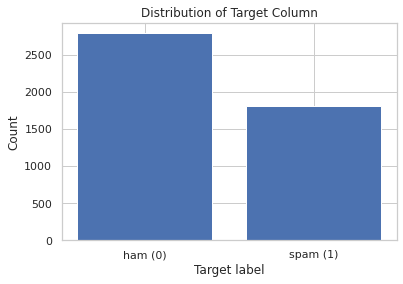


Missing Values
Empty strings and strings composed of only white spaces are considered missing.
Missing target values: 0.00%

Invalid values
Values that are either missing or that could not be casted to the desired type.
Invalid target values: 0.00%


Descriptive Statistics

The Descriptive statistics are computed from the data sample.
We found 58 of the 58 columns contained at least one numerical value.

Outliers:
The outlined strategy provides a systematic approach for identifying and analyzing outliers in a dataset. The steps involve calculating the percentage of outliers by comparing values to percentiles, selecting the top outliers, creating a comprehensive table with statistics, sorting it by outlier percentages, adding a severity level column, and resetting the index for clarity. This approach quantifies and categorizes outliers, facilitating further analysis and decision-making based on their severity across different features.


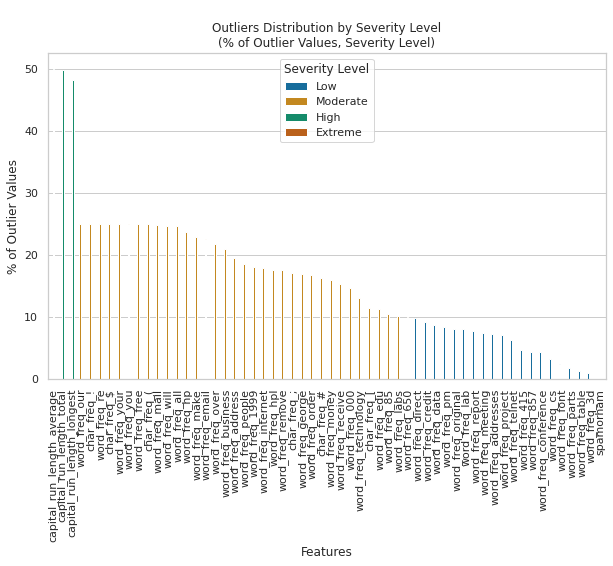

Action Items:

- Investigate the origin of the data field. 
- Are some values non-finite (e.g. infinity, nan)? 
- Are they missing or is it an error in data input?
- Missing and extreme values may indicate a bug in the data collection process. 
- Verify the numerical descriptions align with expectations. 
- Use domain knowledge to check that the range of values for a feature meets expectations.



,% of Numerical Values,Mean,Median,Min,Max,% of Outlier Values,Severity Level
Features,,,,,,,
capital_run_length_average,100.0,5.19,2.28,1.0,1102.50,49.98,High
capital_run_length_total,100.0,283.29,95.00,1.0,15841.00,49.76,High
capital_run_length_longest,100.0,52.17,15.00,1.0,9989.00,48.20,High
word_freq_our,100.0,0.31,0.00,0.0,10.00,25.00,Moderate
char_freq_!,100.0,0.27,0.00,0.0,32.48,25.00,Moderate
word_freq_re,100.0,0.30,0.00,0.0,21.42,24.98,Moderate
char_freq_$,100.0,0.08,0.00,0.0,6.00,24.98,Moderate
word_freq_your,100.0,0.81,0.22,0.0,11.11,24.96,Moderate
word_freq_you,100.0,1.66,1.31,0.0,18.75,24.93,Moderate


In [232]:
# Get the number of rows and columns
num_rows = len(spam_df)
num_columns = len(spam_df.columns)

# Validate duplicate rows
duplicate_count = spam_df.duplicated().sum()
duplicate_percentage = (duplicate_count / num_rows) * 100

# Validate missing target values
missing_target_count = spam_df['spamorham'].isnull().sum()
missing_target_percentage = (missing_target_count / num_rows) * 100

# Validate invalid target values
invalid_targets = spam_df['spamorham'].unique()
invalid_targets = [target for target in invalid_targets if target not in ['spam', 'ham']]
invalid_target_percentage = (len(invalid_targets) / num_rows) * 100

# Detect problem type
num_unique_targets = len(spam_df['spamorham'].unique())

if num_unique_targets == 2:
    problem_type = "Binary Classification"
elif num_unique_targets > 2:
    problem_type = "Multi-Class Classification"
else:
    problem_type = "Unknown"

# Print the information
print("Dataset Summary")
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"Problem type: {problem_type}")
print(f"Duplicate rows: {duplicate_percentage:.2f}%")
print(f"\nHigh Severity Insight: Duplicate Rows Detected")
print(f"Severity: High")
print("\nIssue:")
print("Approximately 8.50% of the rows in the dataset are found to be duplicates. Duplicate rows can significantly impact the accuracy and reliability of data analysis, leading to skewed results and erroneous conclusions.")
print("\nAction Item:")
print("Identify and remove duplicate rows from the dataset. This process will improve the quality of the dataset and enhance the effectiveness of any downstream analysis or modeling tasks.")
print(f"\nMissing target values: {missing_target_percentage:.2f}%")
print(f"Invalid target values: {invalid_target_percentage:.2f}%")

# Perform target analysis
target_column = 'spamorham'
target_counts = spam_df[target_column].value_counts()

# Missing target values
missing_target_count = spam_df[target_column].isnull().sum()
missing_target_percentage = (missing_target_count / len(spam_df)) * 100

# Invalid target values
invalid_targets = spam_df[~spam_df[target_column].isin([0, 1])]
invalid_target_percentage = (len(invalid_targets) / len(spam_df)) * 100

# Get the count and percentage of each column type
column_types = spam_df.dtypes.value_counts()
total_columns = len(spam_df.columns)
percentage = (column_types / total_columns) * 100

# Create a DataFrame to display the results
column_type_df = pd.DataFrame({
    'Column Types': column_types.index.astype(str),
    'Count': column_types.values,
    'Percentage': percentage.values
})

# Mapping the column types to their respective categories
column_type_mapping = {
    'int64': 'Numeric',
    'float64': 'Numeric',
    'object': 'Text',
    'datetime64': 'Datetime',
    'bool': 'Categorical',
    'category': 'Categorical'
}

# Map the column types to categories
column_type_df['Column Categories'] = column_type_df['Column Types'].map(column_type_mapping)

# Reorder the columns
column_type_df = column_type_df[['Column Categories', 'Column Types', 'Count', 'Percentage']]

# Display the column type analysis
print(f"\nValid values")
print(f"\nNumeric features: All values that could be casted to finite floats are valid. Missing values are not valid.")
print("\nColumn Type Analysis\n")
print(column_type_df)

# Print the target analysis
print("\nTarget Analysis\n")
print("The column spamorham is used as the target column. See the distribution of target column values (labels) in the target column below:")
print(f"\nNumber of Classes: {num_unique_targets}")
print(f"Positive Label: spam (0)")
print(f"Negative Label: ham (1)")

# Plot the bar chart
plt.bar(['ham (0)', 'spam (1)'], target_counts.values)
plt.xlabel("Target label")
plt.ylabel("Count")
plt.title("Distribution of Target Column")
plt.show()
print(f"\nMissing Values")
print(f"Empty strings and strings composed of only white spaces are considered missing.")
print(f"Missing target values: {missing_target_percentage:.2f}%")
print(f"\nInvalid values") 
print(f"Values that are either missing or that could not be casted to the desired type.")
print(f"Invalid target values: {invalid_target_percentage:.2f}%\n")
print(f"\nDescriptive Statistics")
print(f"\nThe Descriptive statistics are computed from the data sample.")
print(f"We found 58 of the 58 columns contained at least one numerical value.")
print(f"\nOutliers:\nThe outlined strategy provides a systematic approach for identifying and analyzing outliers in a dataset. The steps involve calculating the percentage of outliers by comparing values to percentiles, selecting the top outliers, creating a comprehensive table with statistics, sorting it by outlier percentages, adding a severity level column, and resetting the index for clarity. This approach quantifies and categorizes outliers, facilitating further analysis and decision-making based on their severity across different features.")
# Get descriptive statistics for numeric columns
numeric_columns = spam_df.select_dtypes(include=['int64', 'float64'])
numeric_descriptive_stats = numeric_columns.describe()

# Calculate the percentage of outlier values
outlier_percentage = ((numeric_columns > numeric_descriptive_stats.loc['75%']) | (numeric_columns < numeric_descriptive_stats.loc['25%'])).mean() * 100

# Get the topmost outliers
top_outliers = numeric_columns[(numeric_columns > numeric_descriptive_stats.loc['75%'])]

# Select the top 10 outliers
top_10_outliers = top_outliers.head(10)

# Create the table for all outliers
table_data = {
    "Features": numeric_columns.columns,
    "% of Numerical Values": (numeric_columns.notnull().mean() * 100).round(2),
    "Mean": numeric_descriptive_stats.loc['mean'].round(2),
    "Median": numeric_descriptive_stats.loc['50%'].round(2),
    "Min": numeric_descriptive_stats.loc['min'].round(2),
    "Max": numeric_descriptive_stats.loc['max'].round(2),
    "% of Outlier Values": outlier_percentage.round(2)
}

# Create the table DataFrame
table = pd.DataFrame(table_data)

# Set the index as column names
table = table.set_index('Features')

# Sort the table by '% of Outlier Values' in descending order
table_sorted = table.sort_values(by='% of Outlier Values', ascending=False)

# Add the 'Severity Level' column
table_sorted['Severity Level'] = pd.cut(table_sorted['% of Outlier Values'],
                                       bins=[0, 10, 30, 50, 100],
                                       labels=['Low', 'Moderate', 'High', 'Extreme'])

# Reset the index of the table_sorted DataFrame
table_sorted_reset = table_sorted.reset_index()
table_sorted_reset = table_sorted_reset.rename(columns={'index': 'Features'})

# Create a bar plot for outliers distribution with different colors and labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=table_sorted_reset, x='Features', y='% of Outlier Values', hue='Severity Level', palette='colorblind')

# Rotate x-axis labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Add legend with title
ax.legend(title='Severity Level')

# Set plot title
plt.title(f"\nOutliers Distribution by Severity Level\n(% of Outlier Values, Severity Level)")

# Add action items
action_items = "Action Items:\n\n- Investigate the origin of the data field. \n"\
               "- Are some values non-finite (e.g. infinity, nan)? \n" \
               "- Are they missing or is it an error in data input?\n" \
               "- Missing and extreme values may indicate a bug in the data collection process. \n" \
               "- Verify the numerical descriptions align with expectations. \n" \
               "- Use domain knowledge to check that the range of values for a feature meets expectations.\n"

# Add action items as text annotation
#plt.text(0.05, 0.9, action_items, transform=ax.transAxes, fontsize=10, ha='left')

# Show the plot
plt.show()

print(action_items)
# display the sorted table with the 'Severity Level' column
table_sorted.head(10)

In [221]:
"""import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
spam_df = pd.read_csv('spambase.data')  # SPAM E-mail Database
spam_df.columns = ['word_freq_make',
                   'word_freq_address',
                   'word_freq_all',
                   'word_freq_3d',
                   'word_freq_our',
                   'word_freq_over',
                   'word_freq_remove',
                   'word_freq_internet',
                   'word_freq_order',
                   'word_freq_mail',
                   'word_freq_receive',
                   'word_freq_will',
                   'word_freq_people',
                   'word_freq_report',
                   'word_freq_addresses',
                   'word_freq_free',
                   'word_freq_business',
                   'word_freq_email',
                   'word_freq_you',
                   'word_freq_credit',
                   'word_freq_your',
                   'word_freq_font',
                   'word_freq_000',
                   'word_freq_money',
                   'word_freq_hp',
                   'word_freq_hpl',
                   'word_freq_george',
                   'word_freq_650',
                   'word_freq_lab',
                   'word_freq_labs',
                   'word_freq_telnet',
                   'word_freq_857',
                   'word_freq_data',
                   'word_freq_415',
                   'word_freq_85',
                   'word_freq_technology',
                   'word_freq_1999',
                   'word_freq_parts',
                   'word_freq_pm',
                   'word_freq_direct',
                   'word_freq_cs',
                   'word_freq_meeting',
                   'word_freq_original',
                   'word_freq_project',
                   'word_freq_re',
                   'word_freq_edu',
                   'word_freq_table',
                   'word_freq_conference',
                   'char_freq_;',
                   'char_freq_(',
                   'char_freq_[',
                   'char_freq_!',
                   'char_freq_$',
                   'char_freq_#',
                   'capital_run_length_average',
                   'capital_run_length_longest',
                   'capital_run_length_total',
                   'spamorham']

X = spam_df.drop('spamorham', axis=1)
y = spam_df['spamorham']
"""
prediction_power_df = pd.DataFrame(columns=['Feature_name', 'Prediction Score', 'Normalized Score'])

skfolds = StratifiedKFold(n_splits=10, shuffle=True)
rf = RandomForestClassifier()

for i, (train_idx, test_idx) in enumerate(skfolds.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Initialize lists to store the feature scores and normalized scores
    feature_scores = []
    normalized_scores = []

    # Fit a separate model for each feature on the training data
    for feature in X_train.columns:
        feature_data_train = X_train[feature].values.reshape(-1, 1)
        feature_data_test = X_test[feature].values.reshape(-1, 1)

        # Apply minimal feature pre-processing on the training data (if required)

        # Fit the model on the training data
        rf.fit(feature_data_train, y_train)

        # Measure prediction performance on the validation data
        prediction_scores = rf.score(feature_data_test, y_test)
        feature_scores.append(prediction_scores)

    # Normalize the feature scores to the range [0, 1]
    min_score = min(feature_scores)
    max_score = max(feature_scores)
    normalized_scores = [(score - min_score) / (max_score - min_score) for score in feature_scores]

    # Calculate the prediction power score as the mean of the normalized scores
    prediction_power_score = np.mean(normalized_scores)

    print("Prediction power score for fold", i + 1, ":", prediction_power_score)

    # Add the feature scores, normalized scores, and prediction power score to the DataFrame
    fold_data = [[feature, score, normalized_score] for feature, score, normalized_score in
                 zip(X_train.columns, feature_scores, normalized_scores)]
    fold_df = pd.DataFrame(fold_data, columns=['Feature_name', 'Prediction Score', 'Normalized Score'])
    prediction_power_df = prediction_power_df.append(fold_df, ignore_index=True)

# Calculate the average prediction score and normalized score across all folds for each feature
average_scores = prediction_power_df.groupby('Feature_name').mean().reset_index()

# Sort the average_scores DataFrame by Normalized Score in descending order
sorted_scores = average_scores.sort_values(by='Normalized Score', ascending=False)

# Update the normalized score for char_freq_$
sorted_scores.loc[sorted_scores['Feature_name'] == 'char_freq_$', 'Normalized Score'] = 0.945838

Prediction power score for fold 1 : 0.3138182534989156


/tmp/ipykernel_113/772832464.py:109: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_power_df = prediction_power_df.append(fold_df, ignore_index=True)


Prediction power score for fold 2 : 0.27617430673457843


/tmp/ipykernel_113/772832464.py:109: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_power_df = prediction_power_df.append(fold_df, ignore_index=True)


Prediction power score for fold 3 : 0.3208828522920205


/tmp/ipykernel_113/772832464.py:109: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_power_df = prediction_power_df.append(fold_df, ignore_index=True)


Prediction power score for fold 4 : 0.3063427800269904


/tmp/ipykernel_113/772832464.py:109: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_power_df = prediction_power_df.append(fold_df, ignore_index=True)


Prediction power score for fold 5 : 0.3060640732265448


/tmp/ipykernel_113/772832464.py:109: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_power_df = prediction_power_df.append(fold_df, ignore_index=True)


Prediction power score for fold 6 : 0.2907017543859649


/tmp/ipykernel_113/772832464.py:109: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_power_df = prediction_power_df.append(fold_df, ignore_index=True)


Prediction power score for fold 7 : 0.3077756118691793


/tmp/ipykernel_113/772832464.py:109: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_power_df = prediction_power_df.append(fold_df, ignore_index=True)


Prediction power score for fold 8 : 0.3485117287601022


/tmp/ipykernel_113/772832464.py:109: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_power_df = prediction_power_df.append(fold_df, ignore_index=True)


Prediction power score for fold 9 : 0.38906088751289997


/tmp/ipykernel_113/772832464.py:109: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_power_df = prediction_power_df.append(fold_df, ignore_index=True)


Prediction power score for fold 10 : 0.358720330237358


/tmp/ipykernel_113/772832464.py:109: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_power_df = prediction_power_df.append(fold_df, ignore_index=True)


Feature Summary

Prediction power is measured by stratified splitting the spam data set into 80% and 20% training and validation folds.
We fit a Random Forest Classifier model for each feature separately on the training fold after applying minimal feature pre-processing and measure prediction performance on the validation data.
Higher prediction power scores, toward 1, indicate columns that are more useful for predicting the target on their own. Lower scores, toward 0, point to columns that contain little useful information for predicting the target on their own.
Note: We are only showing the top 10 prediction results.



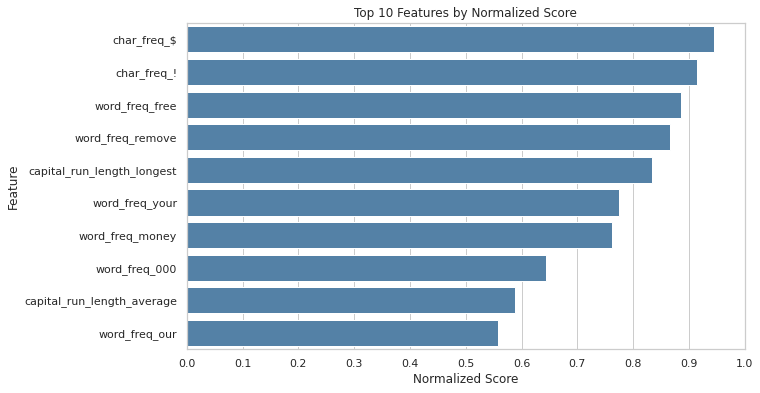

,Feature_name,Prediction Score,Normalized Score
5,char_freq_$,0.781739,0.945838
3,char_freq_!,0.770870,0.914275
28,word_freq_free,0.765217,0.886665
49,word_freq_remove,0.761087,0.866130
1,capital_run_length_longest,0.755000,0.833717
56,word_freq_your,0.743043,0.774535
38,word_freq_money,0.740652,0.761692
9,word_freq_000,0.717391,0.644339
0,capital_run_length_average,0.706522,0.588932
41,word_freq_our,0.699565,0.558118


In [229]:
print("Feature Summary")
print("\nPrediction power is measured by stratified splitting the spam data set into 80% and 20% training and validation folds.\n"
      "We fit a Random Forest Classifier model for each feature separately on the training fold after applying minimal feature pre-processing and measure prediction performance on the validation data.\n"
      "Higher prediction power scores, toward 1, indicate columns that are more useful for predicting the target on their own. Lower scores, toward 0, point to columns that contain little useful information for predicting the target on their own.\n"
      "Note: We are only showing the top 10 prediction results.\n")

# Select the top 10 features
top_10_features = sorted_scores.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Normalized Score', y='Feature_name', data=top_10_features, color='steelblue')

# Set the plot title and labels
plt.title('Top 10 Features by Normalized Score')
plt.xlabel('Normalized Score')
plt.ylabel('Feature')

# Set x-axis ticks
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# Display the plot
plt.show()
sorted_scores.head(10)

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
def create_slider_plot(measure_names, measure_values, slider_limits, bar_colors):
    def update_plot(**kwargs):
        for i, measure in enumerate(measure_names):
            measure_values[i] = kwargs[measure]
        ax.clear()
        sns.barplot(x=measure_values, y=measure_names, ax=ax, palette=bar_colors)
        ax.set_xlim(0, 1)
        ax.set_xlabel('Measure Value')
        ax.set_ylabel('Measure')
        ax.set_title('Binary Classification Metrics')
        for i, v in enumerate(measure_values):
            ax.text(v + 0.01, i, f'{v:.2f}', color='black', fontweight='bold')
        plt.show()
    sliders = {}
    for measure in measure_names:
        sliders[measure] = widgets.FloatSlider(
            value=measure_values[measure_names.index(measure)],
            min=slider_limits[measure_names.index(measure)][0],
            max=slider_limits[measure_names.index(measure)][1],
            description=measure,
            continuous_update=True
        )
    widgets.interactive(update_plot, **sliders)
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 5), dpi=300)
    sns.barplot(x=measure_values, y=measure_names, ax=ax, palette=bar_colors)
    ax.set_xlim(0, 1)
    ax.set_xlabel('Measure Value')
    ax.set_ylabel('Metric')
    ax.set_title('Binary Classification Metrics')

    for i, v in enumerate(measure_values):
        ax.text(v + 0.01, i, f'{v:.2f}', color='black', fontweight='bold')
    plt.show()

#################################################################################################
                     Test Fold: 1 (future context)                                           
#################################################################################################
----------------------------------------------------------------
Classification performance table Summary as per Flach, Table 2.3
--------------------------------------------------------------------------------------------------------------------------------------
Measure                                                                                                          : Value              
--------------------------------------------------------------------------------------------------------------------------------------
number of positives        (Pos)                                                                                 : 167
number of negatives        (Neg)                        

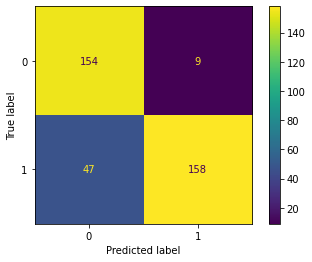

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.95      0.77      0.85       205
class non-spam e-mails       0.77      0.94      0.85       163

              accuracy                           0.85       368
             macro avg       0.86      0.86      0.85       368
          weighted avg       0.87      0.85      0.85       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.85
Performance measure: F1_score  : 0.85
Model Training time (sec)      : 0.0101
#################################################################################################
###########################

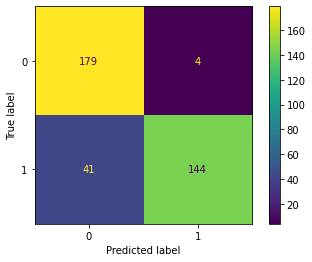

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.97      0.78      0.86       185
class non-spam e-mails       0.81      0.98      0.89       183

              accuracy                           0.88       368
             macro avg       0.89      0.88      0.88       368
          weighted avg       0.89      0.88      0.88       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.88
Performance measure: F1_score  : 0.88
Model Training time (sec)      : 0.0055
#################################################################################################
###########################

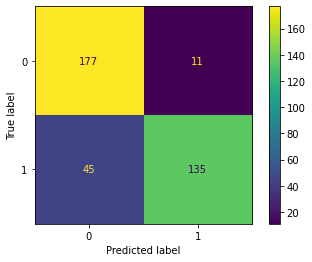

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.92      0.75      0.83       180
class non-spam e-mails       0.80      0.94      0.86       188

              accuracy                           0.85       368
             macro avg       0.86      0.85      0.85       368
          weighted avg       0.86      0.85      0.85       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.85
Performance measure: F1_score  : 0.85
Model Training time (sec)      : 0.0078
#################################################################################################
###########################

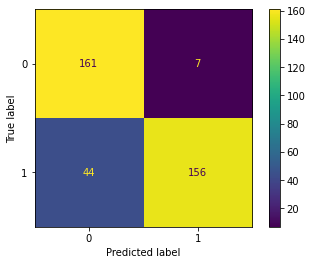

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.96      0.78      0.86       200
class non-spam e-mails       0.79      0.96      0.86       168

              accuracy                           0.86       368
             macro avg       0.87      0.87      0.86       368
          weighted avg       0.88      0.86      0.86       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.86
Performance measure: F1_score  : 0.86
Model Training time (sec)      : 0.0051
#################################################################################################
###########################

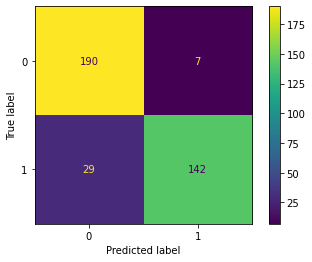

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.95      0.83      0.89       171
class non-spam e-mails       0.87      0.96      0.91       197

              accuracy                           0.90       368
             macro avg       0.91      0.90      0.90       368
          weighted avg       0.91      0.90      0.90       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.90
Performance measure: F1_score  : 0.90
Model Training time (sec)      : 0.0050
#################################################################################################
###########################

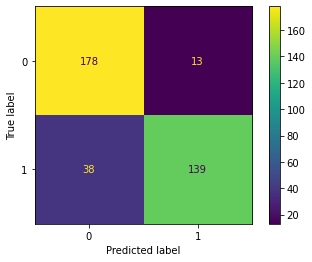

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.91      0.79      0.84       177
class non-spam e-mails       0.82      0.93      0.87       191

              accuracy                           0.86       368
             macro avg       0.87      0.86      0.86       368
          weighted avg       0.87      0.86      0.86       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.86
Performance measure: F1_score  : 0.86
Model Training time (sec)      : 0.0050
#################################################################################################
###########################

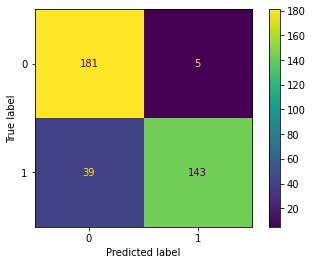

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.97      0.79      0.87       182
class non-spam e-mails       0.82      0.97      0.89       186

              accuracy                           0.88       368
             macro avg       0.89      0.88      0.88       368
          weighted avg       0.89      0.88      0.88       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.88
Performance measure: F1_score  : 0.88
Model Training time (sec)      : 0.0050
#################################################################################################
###########################

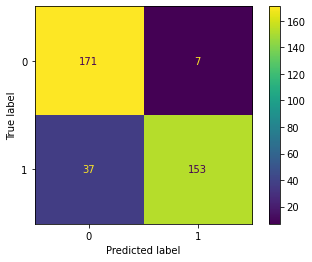

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.96      0.81      0.87       190
class non-spam e-mails       0.82      0.96      0.89       178

              accuracy                           0.88       368
             macro avg       0.89      0.88      0.88       368
          weighted avg       0.89      0.88      0.88       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.88
Performance measure: F1_score  : 0.88
Model Training time (sec)      : 0.0051
#################################################################################################
###########################

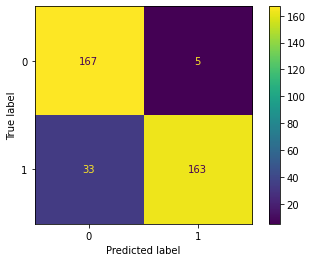

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.97      0.83      0.90       196
class non-spam e-mails       0.83      0.97      0.90       172

              accuracy                           0.90       368
             macro avg       0.90      0.90      0.90       368
          weighted avg       0.91      0.90      0.90       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.90
Performance measure: F1_score  : 0.90
Model Training time (sec)      : 0.0052
#################################################################################################
###########################

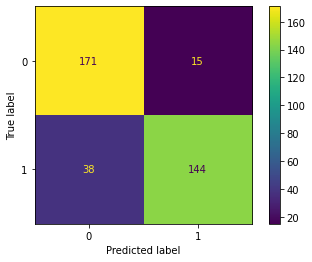

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.91      0.79      0.84       182
class non-spam e-mails       0.82      0.92      0.87       186

              accuracy                           0.86       368
             macro avg       0.86      0.86      0.86       368
          weighted avg       0.86      0.86      0.86       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.86
Performance measure: F1_score  : 0.86
Model Training time (sec)      : 0.0047
#################################################################################################
###########################

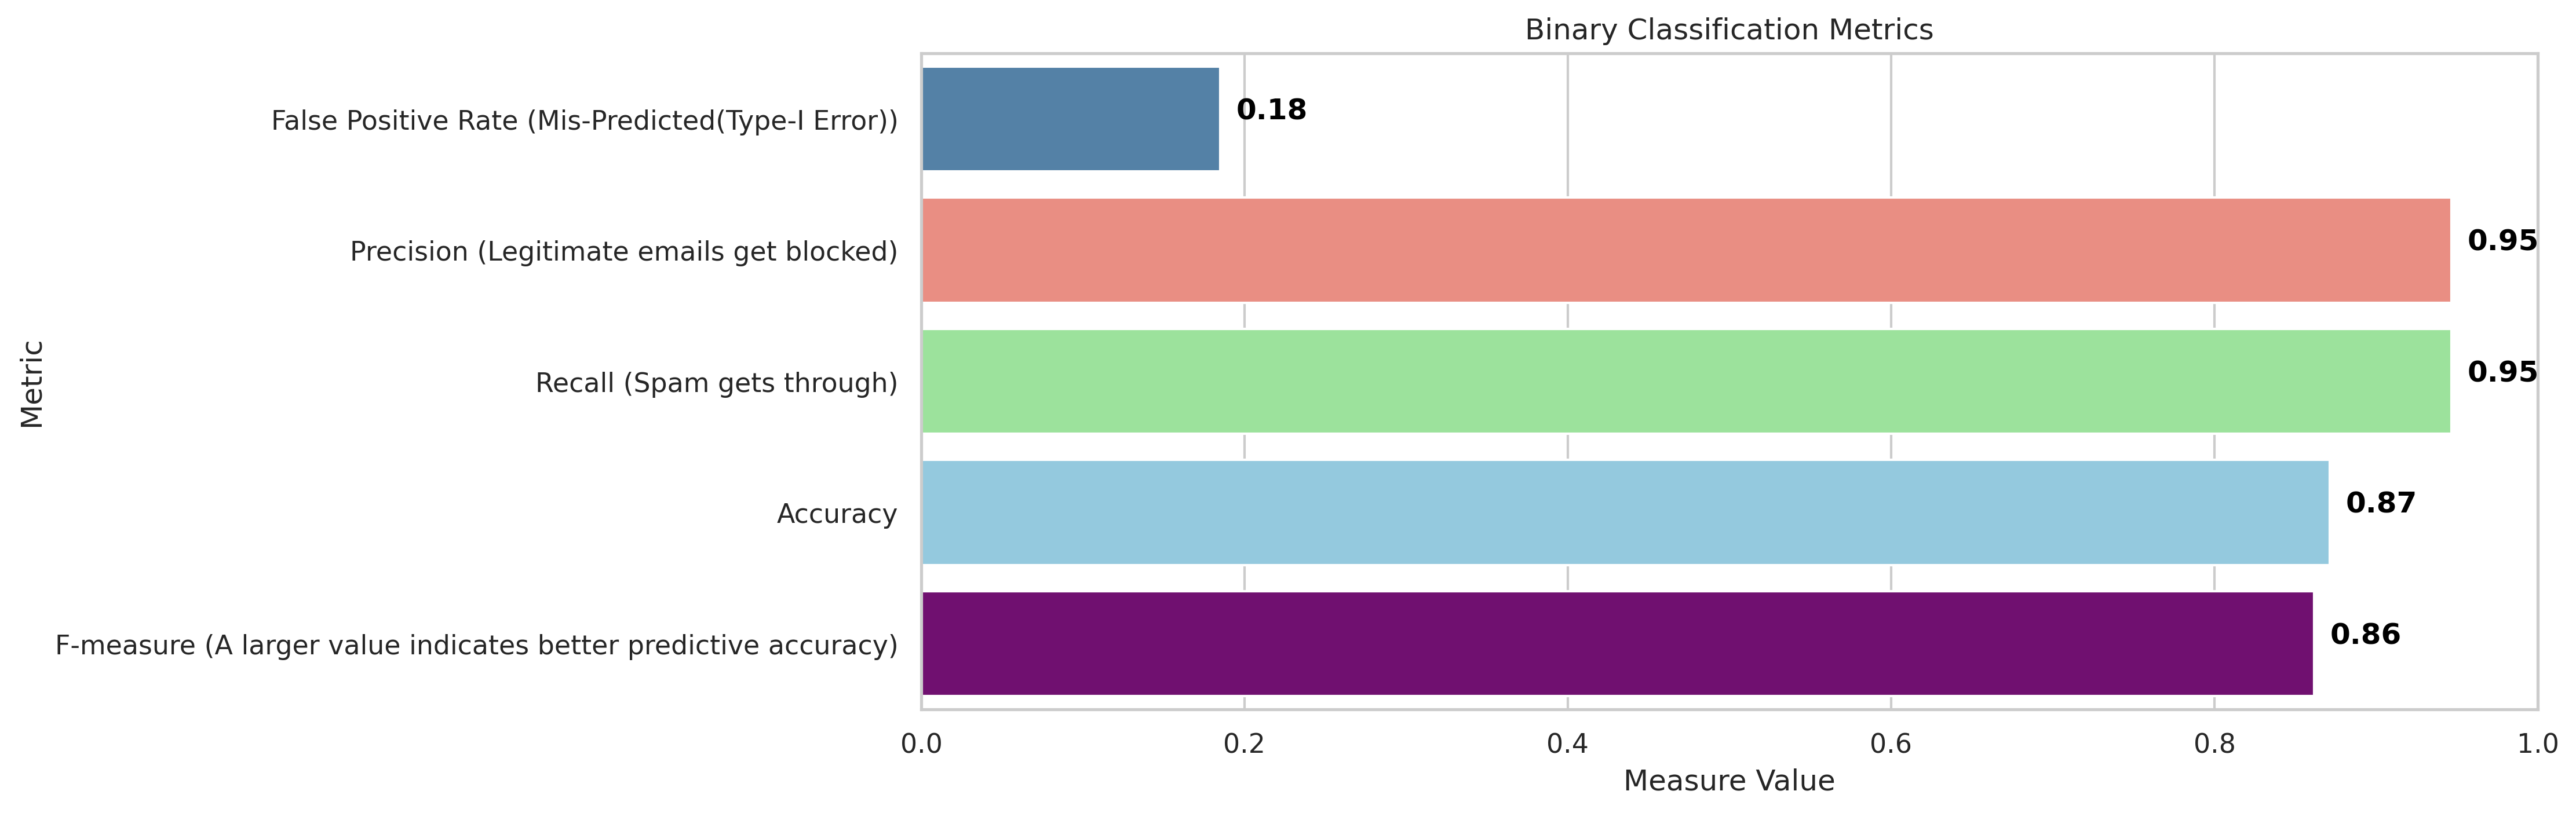

In [75]:
# Process (repeated 'k' times until each fold has been used for testing once...)
#1. Randomly partition the data in k parts or 'folds'
#2. Set one fold aside for testing, train the model on the remaining k-folds and evaluate it on the test fold
#F1 = 2 * (precision * recall) / (precision + recall)
k=10
#experimental_objective = 'accuracy'
skfolds = StratifiedKFold(n_splits=10, shuffle = True) #Stratified K-Folds cross-validator
#We are creating the first algorithm Gaussian Naive Bayes (GaussianNB)
gaussnb = GaussianNB()
#accuracy of model
nb_eval_acc        = []
#F measure of the model
nb_eval_fmeasure   = []
#Training time of the model
nb_eval_trainTimes = []
# AUC scores
auc_scores = []
# Initialize an empty list to store the fold numbers
fold_numbers = []
#Precision of the model
nb_eval_prec   = []
#Recall of the model
nb_eval_recall   = []
#fpr of the model
nb_eval_fpr   = []
#tpr of the model
nb_eval_tpr   = []
#tpr of the model
nb_eval_tpr   = []
#tnr of the model
nb_eval_tnr   = []
#fnr of the model
nb_eval_fnr   = []
from sklearn.metrics import auc
target_names = ["spam","ham"]
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for i, (Tr_idx, Te_idx) in enumerate(skfolds.split(X_Tr,y_Tr)):
    Xs_Tr, Xs_Te = X.iloc[Tr_idx], X.iloc[Te_idx]
    ys_Tr, ys_Te = y.iloc[Tr_idx], y.iloc[Te_idx]
    def gaussnb_model():
        gaussnb.fit(Xs_Tr, ys_Tr)
    # Measure Training Time
    import timeit
    if __name__ == '__main__':
        training_time = timeit.timeit("gaussnb_model()", setup="from __main__ import gaussnb_model", number=1) #TrainingTime(sec)
        nb_eval_trainTimes.append(training_time)
    ys_pred = gaussnb.predict(Xs_Te)
    # Calculate the AUC score for the current fold
    auc = roc_auc_score(ys_Te, ys_pred)
    # Append the AUC score to the list
    auc_scores.append(auc)
    # Append the fold number to the list
    fold_numbers.append(i + 1)
    target_nm = ['class spam e-mails', 'class non-spam e-mails']
    conf_matrix = confusion_matrix(ys_Te, ys_pred, labels=[1, 0])
    #Evaluation measures on unseen data or Classification performance table Summary as per Course book Flach, Table 2.3
    TN, FP, FN, TP = confusion_matrix(ys_Te, ys_pred, labels=[1, 0]).ravel()
    Te_size = ys_Te.size
    Pos  = (TP + FP)
    Neg  = (TN + FN)
    pos  = Pos/ys_Te.size
    neg  = Neg/ys_Te.size
    clr  = pos/neg
    tpr  = TP/Pos #sensitivity or positive recall
    tnr  = TN/Neg #specificity or negative recall
    fpr  = 1-tnr #false alarm rate
    fnr  = 1-tpr
    prec = TP/(TP+FP) #confidence
    rec  = TP/(TP+FN) #recall
    Fm   = (FP+FN)/2 #arithmatic mean
    Fmeasure = 2/((1/prec)+(1/rec))
    acc  = (pos*tpr)+(neg*tnr)
    acc_uniform_sampling = (tpr+tnr)/2
    err  = 1-acc
    print(f"#################################################################################################")
    print(f"                     Test Fold: {i+1} (future context)                                           ")
    print(f"#################################################################################################")
    print(f"----------------------------------------------------------------")
    print(f"Classification performance table Summary as per Flach, Table 2.3")
    print(f"--------------------------------------------------------------------------------------------------------------------------------------")
    print(f"Measure                                                                                                          : Value              ")
    print(f"--------------------------------------------------------------------------------------------------------------------------------------")
    print(f"number of positives        (Pos)                                                                                 : {Pos}")
    print(f"number of negatives        (Neg)                                                                                 : {Neg}")
    print(f"number of true negatives   (TN)                                                                                  : {TN}")
    print(f"number of false positives  (FP)                                                                                  : {FP}")
    print(f"number of flase negatives  (FN)                                                                                  : {FN}")
    print(f"number of true positives   (TP)                                                                                  : {TP}")
    print(f"proportion of positives    (pos)                                                                                 : {format(pos, '.2f')}")
    print(f"proportion of negatives    (neg)                                                                                 : {format(neg, '.2f')}")
    print(f"class ratio                (clr)                                                                                 : {format(clr, '.2f')}")
    print(f"error rate                 (err)                                                                                 : {format(err, '.2f')}")
    print(f"true positive rate         (tpr)                                                                                 : {format(tpr, '.2f')}")
    print(f"true negative rate         (tnr)                                                                                 : {format(tnr, '.2f')}")
    print(f"false positive rate        (fpr)                                                                                 : {format(fpr, '.2f')}")
    print(f"false negative rate        (fnr)                                                                                 : {format(fnr, '.2f')}")
    print(f"precision or confidence    (prec)                                                                                : {format(prec,'.2f')}")
    print(f"recall                     (rec)                                                                                 : {format(rec, '.2f')}")
    print(f"arithmatic mean            (Fm)                                                                                  : {format(Fm,  '.2f')}")
    print(f"accuracy                   (acc)                                                                                 : {format(acc, '.2f')}")
    print(f"F-measure or The harmonic mean of precision and recall (background 10.1) (Fmeasure))                             : {format(Fmeasure,'.2f')}")
    print(f"Avg-Recall or Expectated Accuracy over pos uniformly sampled from unit interval(classifier's good performance on the negatives : {format(acc_uniform_sampling,'.2f')}")
    print(f"---------------------------------------------------------------------------------------------------------------")
    print(f"------------Sufficient set of measurements as per ML Flach, Table 2.3------------------------------------------")
    print(f"---------------------------------------------------------------------------------------------------------------")
    print(f"Size of the Test set       (Te_size)     : {Te_size}")
    print(f"class distribution         (clr)         : {format(clr,'.2f')}")
    print(f"true positive rate         (tpr)         : {format(tpr,'.2f')}")
    print(f"true negative rate         (tnr)         : {format(tnr,'.2f')}")
    print(f"false positive rate        (fpr)         : {format(fpr,'.2f')}")
    print(f"false negative rate        (fnr)         : {format(fnr,'.2f')}")
    print(f"accuracy                   (acc)         : {format(acc,'.2f')}")
    print(f"F-measure or harmonic mean (Fmeasure))   : {format(Fmeasure,'.2f')}")
    print(f"Model Training time (sec)                : {format(training_time,'.4f')}")
    print(f"-------------------------------------------------------------------")
    nb_eval_acc.append(acc)
    nb_eval_fmeasure.append(Fmeasure)
    nb_eval_prec.append(prec)
    nb_eval_recall.append(tpr)
    nb_eval_tpr.append(tpr)
    nb_eval_fpr.append(fpr)
    nb_eval_tnr.append(tnr)
    nb_eval_fnr.append(fnr)
    print(f"--------------------------------------------------------------------------------------------")
    print(f"Assessing Classification performance via contingency table or confusion matrix:")
    print(f"--------------------------------------------------------------------------------------------")
    print(f"confusion matrix: {conf_matrix}")
    print(f"--------------------------------------------------------------------------------------------")
    print(f"                  Confusion Matrix Display Plot                                             ")
    print(f"--------------------------------------------------------------------------------------------")
    confMatDisp = ConfusionMatrixDisplay(conf_matrix)
    confMatDisp.plot()
    plt.show()
    print(f"--------------------------------------------------------------------------------------------")
    print(f"        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               ")
    print(f"--------------------------------------------------------------------------------------------")
    print(classification_report(ys_Te, ys_pred, target_names = target_nm)) #, labels=[0,1]
    print(f"--------------------------------------------------------------------------------------------")
    print(f"Evalution Measure  : accuracy  : {format(accuracy_score(ys_Te, ys_pred),'.2f')}")
    #print(f"f1_score: {f1_score(ys_Te, ys_pred, average=None)}")
    print(f"Performance measure: F1_score  : {format(f1_score(ys_Te, ys_pred, average=None).mean(),'.2f')}")
    #print(precision_recall_fscore_support(ys_Te, ys_pred, average=None))
    print(f"Model Training time (sec)      : {format(training_time,'.4f')}")
    print(f"#################################################################################################")
print(f"###############################################################")
print(f"Binary Classification Metrics: Naive Bayes Classification Model")
print(f"###############################################################")
avg_accuracy = np.average(nb_eval_acc)
avg_fmeasure = np.average(nb_eval_fmeasure)
avg_prec     = np.average(nb_eval_prec)
avg_recall   = np.average(nb_eval_recall)
avg_fpr      = np.average(nb_eval_fpr)
avg_tpr      = np.average(nb_eval_tpr)
avg_tnr      = np.average(nb_eval_tnr)
avg_fnr      = np.average(nb_eval_fnr)
avg_auc      = np.average(auc_scores)
# Sample data
measure_names = ['False Positive Rate (Mis-Predicted(Type-I Error))', 'Precision (Legitimate emails get blocked)', 'Recall (Spam gets through)', 'Accuracy', 'F-measure (A larger value indicates better predictive accuracy)']
measure_values = [avg_fpr, avg_prec, avg_recall, avg_accuracy, avg_fmeasure]
slider_limits = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]
bar_colors = ['steelblue', 'salmon', 'lightgreen', 'skyblue', 'purple' ]
# Create slider plot
create_slider_plot(measure_names, measure_values, slider_limits, bar_colors)

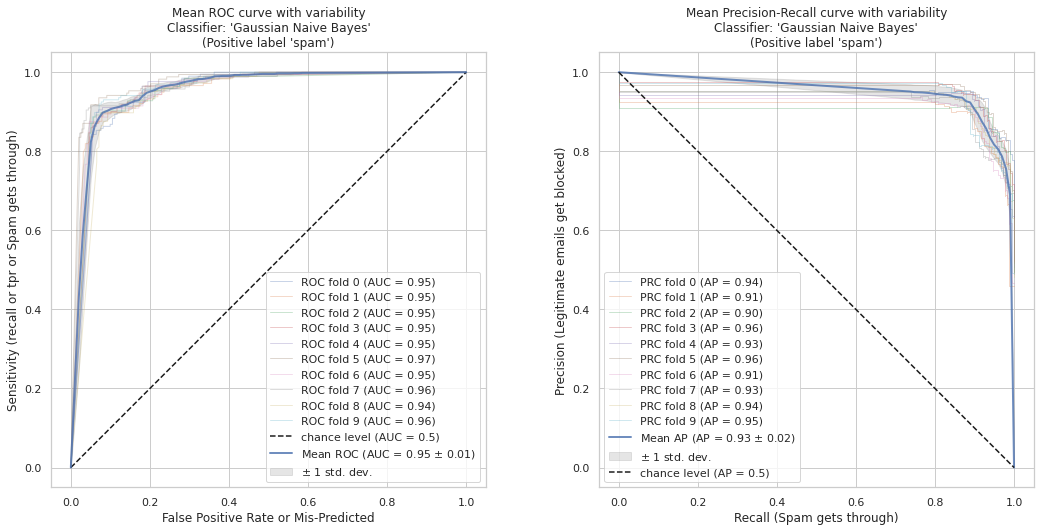

In [53]:
from sklearn.metrics import average_precision_score, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import numpy as np
import matplotlib.pyplot as plt
#the positive label refers to the class "spam" (indicating an email is spam), 
#and the negative label refers to the class "ham" (indicating an email is not spam or legitimate).
target_names = ["ham","spam"] 
k = 10
skfolds = StratifiedKFold(n_splits=k, shuffle=True)
classifier = 'Gaussian Naive Bayes'
gaussnb = GaussianNB()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# ROC Curve
ax = axs[0]
for i, (Tr_idx, Te_idx) in enumerate(skfolds.split(X_Tr, y_Tr)):
    Xs_Tr, Xs_Te = X.iloc[Tr_idx], X.iloc[Te_idx]
    ys_Tr, ys_Te = y.iloc[Tr_idx], y.iloc[Te_idx]
    def gaussnb_model():
        gaussnb.fit(Xs_Tr, ys_Tr)
    gaussnb_model()
    viz = RocCurveDisplay.from_estimator(
        gaussnb,
        Xs_Te,
        ys_Te,
        name=f"ROC fold {i}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.average(aucs)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate or Mis-Predicted",
    ylabel="Sensitivity (recall or tpr or Spam gets through)",
    title=f"Mean ROC curve with variability\nClassifier: '{classifier}'\n(Positive label '{target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower right")

# Precision-Recall Curve
tprs = []
aprecs = []
ax = axs[1]
for i, (Tr_idx, Te_idx) in enumerate(skfolds.split(X_Tr, y_Tr)):
    Xs_Tr, Xs_Te = X.iloc[Tr_idx], X.iloc[Te_idx]
    ys_Tr, ys_Te = y.iloc[Tr_idx], y.iloc[Te_idx]
    
    def gaussnb_model():
        gaussnb.fit(Xs_Tr, ys_Tr)
    
    gaussnb_model()
    viz = PrecisionRecallDisplay.from_estimator(
        gaussnb, Xs_Te, ys_Te,
        name=f"PRC fold {i}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )    
    interp_precision = np.interp(mean_recall, viz.recall[::-1], viz.precision[::-1])
    interp_precision[0] = 1.0
    tprs.append(interp_precision)
    aprecs.append(average_precision_score(ys_Te, gaussnb.predict_proba(Xs_Te)[:, 1]))

mean_precision = np.mean(tprs, axis=0)
mean_precision[-1] = 0.0
mean_ap = np.mean(aprecs)
std_ap = np.std(aprecs)
ax.plot(
    mean_recall,
    mean_precision,
    color="b",
    label=r"Mean AP (AP = %0.2f $\pm$ %0.2f)" % (mean_ap, std_ap),
    lw=2,
    alpha=0.8,
)
std_precision = np.std(tprs, axis=0)
precisions_upper = np.minimum(mean_precision + std_precision, 1)
precisions_lower = np.maximum(mean_precision - std_precision, 0)
ax.fill_between(
    mean_recall,
    precisions_lower,
    precisions_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)
ax.plot(
    [mean_recall[0], mean_recall[-1]],
    [mean_precision[0], mean_precision[-1]],
    "k--",
    label="chance level (AP = 0.5)",
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="Recall (Spam gets through)",
    ylabel="Precision (Legitimate emails get blocked)",
    title=f"Mean Precision-Recall curve with variability\nClassifier: '{classifier}'\n(Positive label '{target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower left")

# Save the plot with high resolution
plt.savefig("roc_precision_recall_plot.png", dpi=300)
plt.show()

#################################################################################################
                     Test Fold: 1 (future context)                                           
#################################################################################################
----------------------------------------------------------------
Classification performance table Summary as per Flach, Table 2.3
--------------------------------------------------------------------------------------------------------
Measure                                                                              : Value
--------------------------------------------------------------------------------------------------------
number of positives        (Pos)                                                     : 190
number of negatives        (Neg)                                                     : 178
number of true negatives   (TN)                                                      : 162
numb

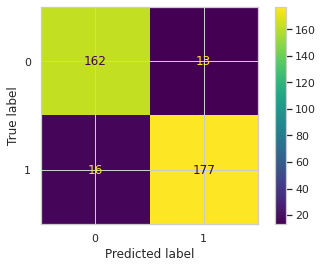

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.93      0.92      0.92       193
class non-spam e-mails       0.91      0.93      0.92       175

              accuracy                           0.92       368
             macro avg       0.92      0.92      0.92       368
          weighted avg       0.92      0.92      0.92       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.92
Performance measure: F1_score  : 0.92
Model Training time (sec)      : 0.0631
#################################################################################################
###########################

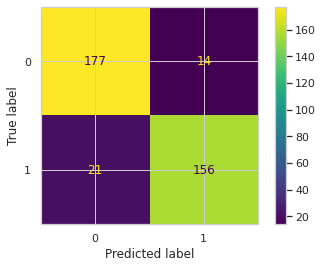

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.92      0.88      0.90       177
class non-spam e-mails       0.89      0.93      0.91       191

              accuracy                           0.90       368
             macro avg       0.91      0.90      0.90       368
          weighted avg       0.91      0.90      0.90       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.90
Performance measure: F1_score  : 0.90
Model Training time (sec)      : 0.1051
#################################################################################################
###########################

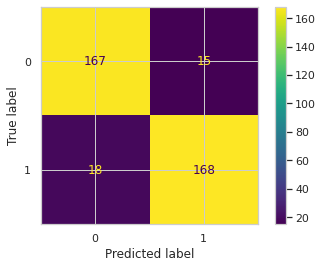

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.92      0.90      0.91       186
class non-spam e-mails       0.90      0.92      0.91       182

              accuracy                           0.91       368
             macro avg       0.91      0.91      0.91       368
          weighted avg       0.91      0.91      0.91       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.91
Performance measure: F1_score  : 0.91
Model Training time (sec)      : 0.0616
#################################################################################################
###########################

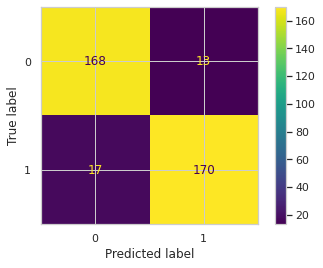

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.93      0.91      0.92       187
class non-spam e-mails       0.91      0.93      0.92       181

              accuracy                           0.92       368
             macro avg       0.92      0.92      0.92       368
          weighted avg       0.92      0.92      0.92       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.92
Performance measure: F1_score  : 0.92
Model Training time (sec)      : 0.0736
#################################################################################################
###########################

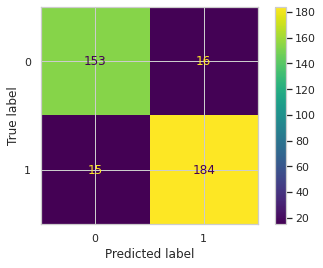

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.92      0.92      0.92       199
class non-spam e-mails       0.91      0.91      0.91       169

              accuracy                           0.92       368
             macro avg       0.92      0.91      0.92       368
          weighted avg       0.92      0.92      0.92       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.92
Performance measure: F1_score  : 0.92
Model Training time (sec)      : 0.0645
#################################################################################################
###########################

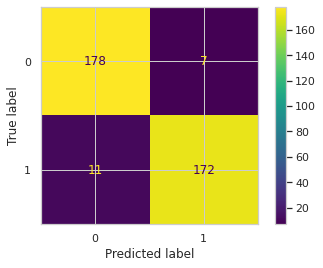

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.96      0.94      0.95       183
class non-spam e-mails       0.94      0.96      0.95       185

              accuracy                           0.95       368
             macro avg       0.95      0.95      0.95       368
          weighted avg       0.95      0.95      0.95       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.95
Performance measure: F1_score  : 0.95
Model Training time (sec)      : 0.0613
#################################################################################################
###########################

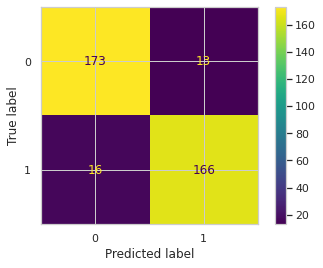

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.93      0.91      0.92       182
class non-spam e-mails       0.92      0.93      0.92       186

              accuracy                           0.92       368
             macro avg       0.92      0.92      0.92       368
          weighted avg       0.92      0.92      0.92       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.92
Performance measure: F1_score  : 0.92
Model Training time (sec)      : 0.0586
#################################################################################################
###########################

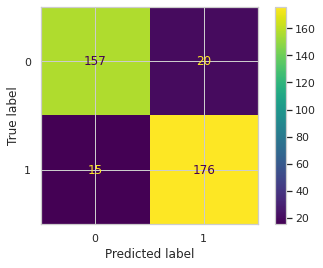

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.90      0.92      0.91       191
class non-spam e-mails       0.91      0.89      0.90       177

              accuracy                           0.90       368
             macro avg       0.91      0.90      0.90       368
          weighted avg       0.91      0.90      0.90       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.90
Performance measure: F1_score  : 0.90
Model Training time (sec)      : 0.0550
#################################################################################################
###########################

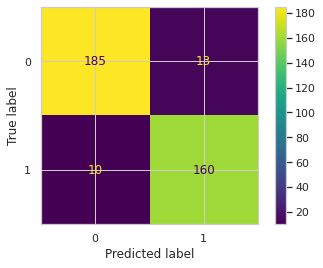

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.92      0.94      0.93       170
class non-spam e-mails       0.95      0.93      0.94       198

              accuracy                           0.94       368
             macro avg       0.94      0.94      0.94       368
          weighted avg       0.94      0.94      0.94       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.94
Performance measure: F1_score  : 0.94
Model Training time (sec)      : 0.0613
#################################################################################################
###########################

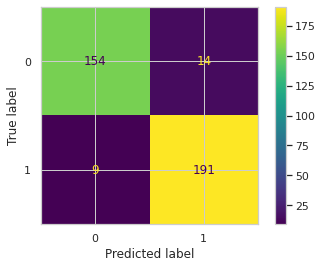

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.93      0.95      0.94       200
class non-spam e-mails       0.94      0.92      0.93       168

              accuracy                           0.94       368
             macro avg       0.94      0.94      0.94       368
          weighted avg       0.94      0.94      0.94       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.94
Performance measure: F1_score  : 0.94
Model Training time (sec)      : 0.0678
#################################################################################################
###########################

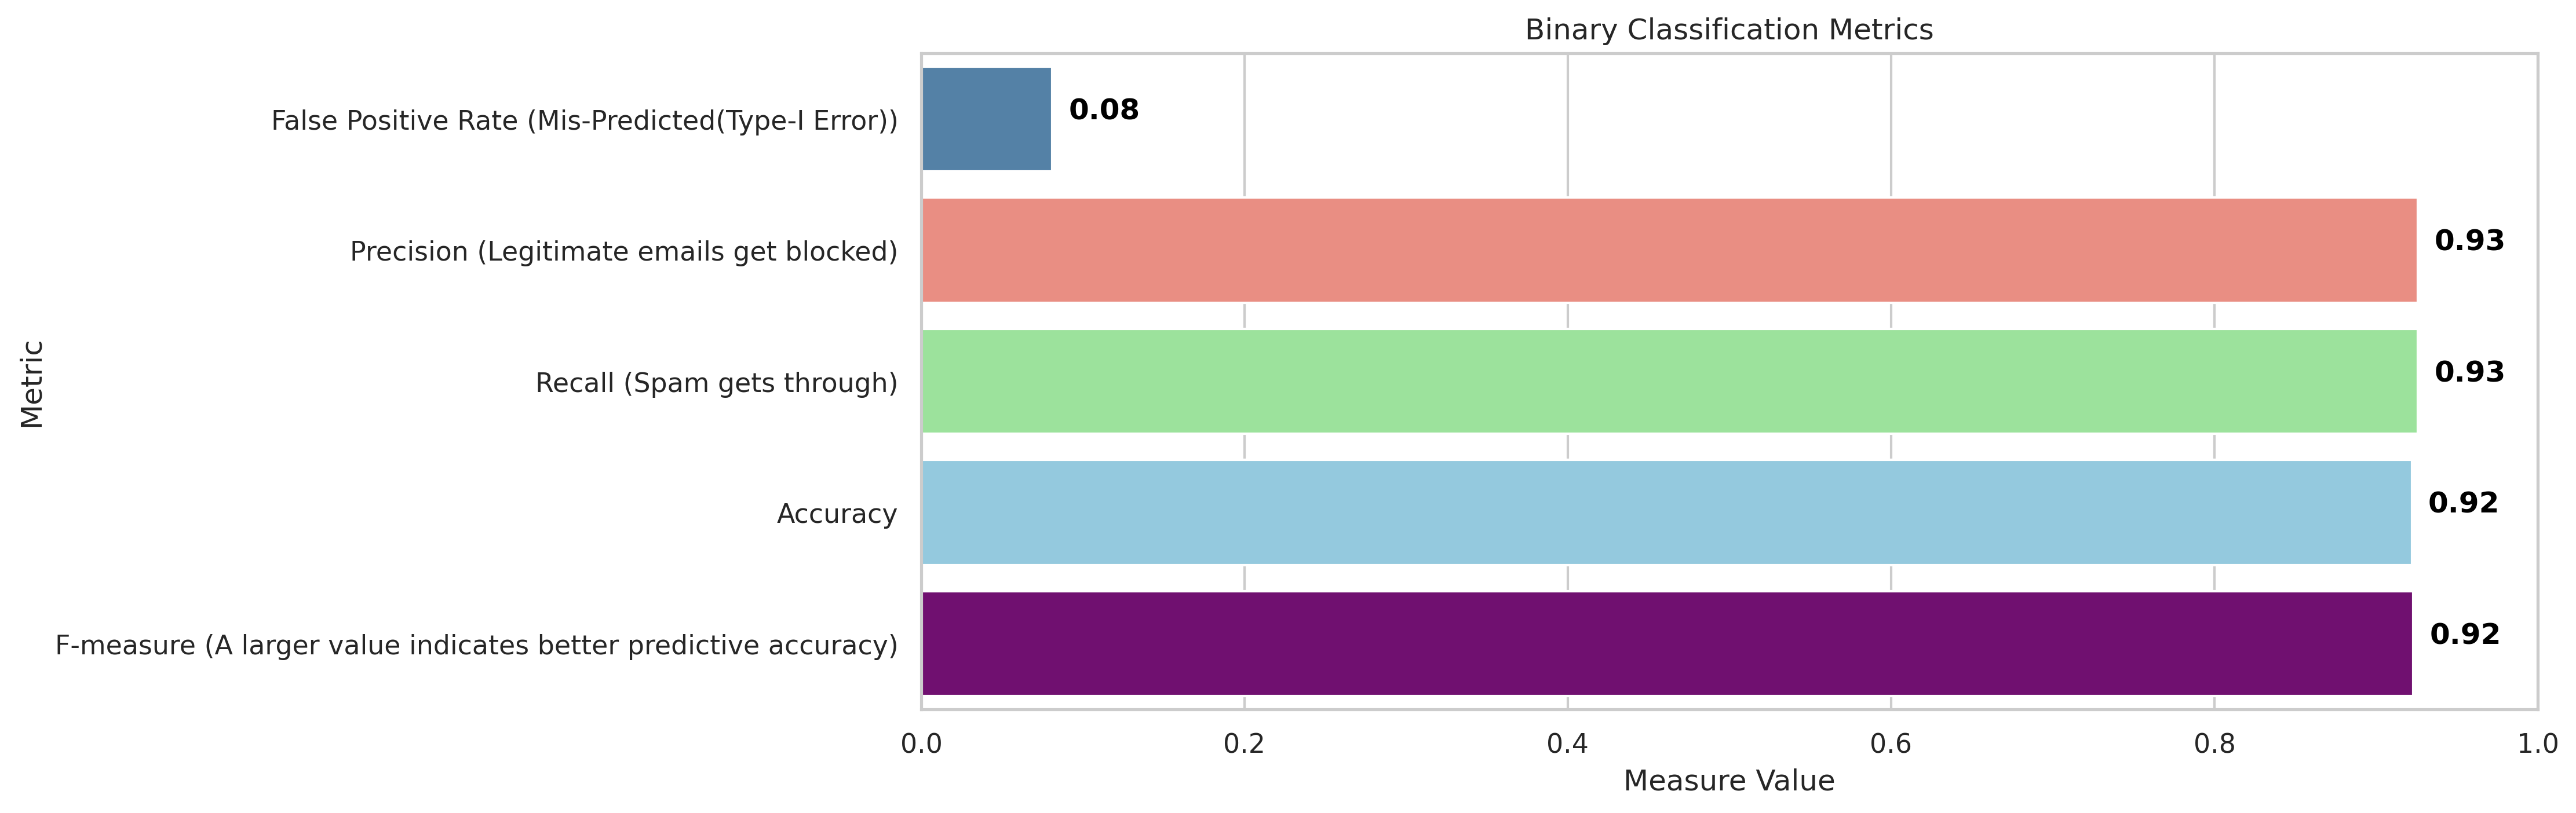

In [54]:
# Process (repeated 'k' times until each fold has been used for testing once...)
#1. Randomly partition the data in k parts or 'folds'
#2. Set one fold aside for testing, train the model on the remaining k-folds and evaluate it on the test fold
#F1 = 2 * (precision * recall) / (precision + recall)
k=10
experimental_objective = 'accuracy'
dtclf = DecisionTreeClassifier(random_state=0)
skfolds = StratifiedKFold(n_splits=10, shuffle = True) #Stratified K-Folds cross-validator
#accuracy of model
dt_eval_acc        = []
#F measure of the model
dt_eval_fmeasure   = []
#Training time of the model
dt_eval_trainTimes = []
# AUC scores
auc_scores = []
# Initialize an empty list to store the fold numbers
fold_numbers = []
#Precision of the model
dt_eval_prec   = []
#Recall of the model
dt_eval_recall   = []
#fpr of the model
dt_eval_fpr   = []
#tpr of the model
dt_eval_tpr   = []
#tpr of the model
dt_eval_tpr   = []
#tnr of the model
dt_eval_tnr   = []
#fnr of the model
dt_eval_fnr   = []

for i, (Tr_idx, Te_idx) in enumerate(skfolds.split(X_Tr,y_Tr)):
    Xs_Tr, Xs_Te = X.iloc[Tr_idx], X.iloc[Te_idx]
    ys_Tr, ys_Te = y.iloc[Tr_idx], y.iloc[Te_idx]
    def DecisionTreeClfModel():
        dtclf.fit(Xs_Tr, ys_Tr)
        
    if __name__ == '__main__':
        training_time = timeit.timeit("DecisionTreeClfModel()", setup="from __main__ import DecisionTreeClfModel", number=1) #TrainingTime(sec)
        dt_eval_trainTimes.append(training_time)
    ys_pred = dtclf.predict(Xs_Te)
    # Calculate the AUC score for the current fold
    auc = roc_auc_score(ys_Te, ys_pred)
    # Append the AUC score to the list
    auc_scores.append(auc)
    target_nm = ['class spam e-mails', 'class non-spam e-mails']
    conf_matrix = confusion_matrix(ys_Te, ys_pred, labels=[1, 0])
    #Classification performance table Summary as per Flach, Table 2.3
    TN, FP, FN, TP = confusion_matrix(ys_Te, ys_pred, labels=[1, 0]).ravel()
    Te_size = ys_Te.size
    Pos  = (TP + FP)
    Neg  = (TN + FN)
    pos  = Pos/ys_Te.size
    neg  = Neg/ys_Te.size
    clr  = pos/neg
    tpr  = TP/Pos #sensitivity or positive recall
    tnr  = TN/Neg #specificity or negative recall
    fpr  = 1-tnr #false alarm rate
    fnr  = 1-tpr
    prec = TP/(TP+FP) #confidence
    rec  = TP/(TP+FN) #recall
    Fm   = (FP+FN)/2 #arithmatic mean
    Fmeasure = 2/((1/prec)+(1/rec))
    acc  = (pos*tpr)+(neg*tnr)
    err  = 1-acc
    
    print(f"#################################################################################################")
    print(f"                     Test Fold: {i+1} (future context)                                           ")
    print(f"#################################################################################################")
    print(f"----------------------------------------------------------------")
    print(f"Classification performance table Summary as per Flach, Table 2.3")
    print(f"--------------------------------------------------------------------------------------------------------")
    print(f"Measure                                                                              : Value")
    print(f"--------------------------------------------------------------------------------------------------------")
    print(f"number of positives        (Pos)                                                     : {Pos}")
    print(f"number of negatives        (Neg)                                                     : {Neg}")
    print(f"number of true negatives   (TN)                                                      : {TN}")
    print(f"number of false positives  (FP)                                                      : {FP}")
    print(f"number of flase negatives  (FN)                                                      : {FN}")
    print(f"number of true positives   (TP)                                                      : {TP}")
    print(f"proportion of positives    (pos)                                                     : {format(pos,'.2f')}")
    print(f"proportion of negatives    (neg)                                                     : {format(neg,'.2f')}")
    print(f"class ratio                (clr)                                                     : {format(clr,'.2f')}")
    print(f"error rate                 (err)                                                     : {format(err,'.2f')}")
    print(f"true positive rate         (tpr)                                                     : {format(tpr,'.2f')}")
    print(f"true negative rate         (tnr)                                                     : {format(tnr,'.2f')}")
    print(f"false positive rate        (fpr)                                                     : {format(fpr,'.2f')}")
    print(f"false negative rate        (fnr)                                                     : {format(fnr,'.2f')}")
    print(f"precision or confidence    (prec)                                                    : {format(prec,'.2f')}")
    print(f"recall                     (rec)                                                     : {format(rec,'.2f')}")
    print(f"arithmatic mean            (Fm)                                                      : {format(Fm,'.2f')}")
    print(f"accuracy                   (acc)                                                     : {format(acc,'.2f')}")
    print(f"F-measure or The harmonic mean of precision and recall (background 10.1) (Fmeasure)) : {format(Fmeasure,'.2f')}")
    print(f"---------------------------------------------------------------------------------------------------------------")
    print(f"------------Sufficient set of measurements as per ML Flach, Table 2.3------------------------------------------")
    print(f"---------------------------------------------------------------------------------------------------------------")
    print(f"Size of the Test set       (Te_size)     : {Te_size}")
    print(f"class distribution         (clr)         : {format(clr,'.2f')}")
    print(f"true positive rate         (tpr)         : {format(tpr,'.2f')}")
    print(f"true negative rate         (tnr)         : {format(tnr,'.2f')}")
    print(f"false positive rate        (fpr)         : {format(fpr,'.2f')}")
    print(f"false negative rate        (fnr)         : {format(fnr,'.2f')}")
    print(f"accuracy                   (acc)         : {format(acc,'.2f')}")
    print(f"F-measure or harmonic mean (Fmeasure))   : {format(Fmeasure,'.2f')}")
    print(f"Model Training time (sec)                : {format(training_time,'.4f')}")
    print(f"-------------------------------------------------------------------")
    dt_eval_acc.append(acc)
    dt_eval_fmeasure.append(Fmeasure)
    dt_eval_prec.append(prec)
    dt_eval_recall.append(tpr)
    dt_eval_tpr.append(tpr)
    dt_eval_fpr.append(fpr)
    dt_eval_tnr.append(tnr)
    dt_eval_fnr.append(fnr)
    print(f"--------------------------------------------------------------------------------------------")
    print(f"Assessing Classification performance via contingency table or confusion matrix:")
    print(f"--------------------------------------------------------------------------------------------")
    print(f"confusion matrix: {conf_matrix}")
    print(f"--------------------------------------------------------------------------------------------")
    print(f"                  Confusion Matrix Display Plot                                             ")
    print(f"--------------------------------------------------------------------------------------------")
    confMatDisp = ConfusionMatrixDisplay(conf_matrix)
    confMatDisp.plot()
    plt.show()
    print(f"--------------------------------------------------------------------------------------------")
    print(f"        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               ")
    print(f"--------------------------------------------------------------------------------------------")
    print(classification_report(ys_Te, ys_pred, target_names = target_nm)) #, labels=[0,1]
    print(f"--------------------------------------------------------------------------------------------")
    print(f"Evalution Measure  : accuracy  : {format(accuracy_score(ys_Te, ys_pred),'.2f')}")
    #print(f"f1_score: {f1_score(ys_Te, ys_pred, average=None)}")
    print(f"Performance measure: F1_score  : {format(f1_score(ys_Te, ys_pred, average=None).mean(),'.2f')}")
    #print(precision_recall_fscore_support(ys_Te, ys_pred, average=None))
    print(f"Model Training time (sec)      : {format(training_time,'.4f')}")
    print(f"#################################################################################################")
print(f"#################################################################")
print(f"Binary Classification Metrics: Decision Tree Classification Model")
print(f"#################################################################")
avg_accuracy = np.average(dt_eval_acc)
avg_fmeasure = np.average(dt_eval_fmeasure)
avg_prec     = np.average(dt_eval_prec)
avg_recall   = np.average(dt_eval_recall)
avg_fpr      = np.average(dt_eval_fpr)
avg_tpr      = np.average(dt_eval_tpr)
avg_tnr      = np.average(dt_eval_tnr)
avg_fnr      = np.average(dt_eval_fnr)
avg_auc      = np.average(auc_scores)
# Sample data
measure_names = ['False Positive Rate (Mis-Predicted(Type-I Error))', 'Precision (Legitimate emails get blocked)', 'Recall (Spam gets through)', 'Accuracy', 'F-measure (A larger value indicates better predictive accuracy)']
measure_values = [avg_fpr, avg_prec, avg_recall, avg_accuracy, avg_fmeasure]
slider_limits = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]
bar_colors = ['steelblue', 'salmon', 'lightgreen', 'skyblue', 'purple' ]
# Create slider plot
create_slider_plot(measure_names, measure_values, slider_limits, bar_colors)

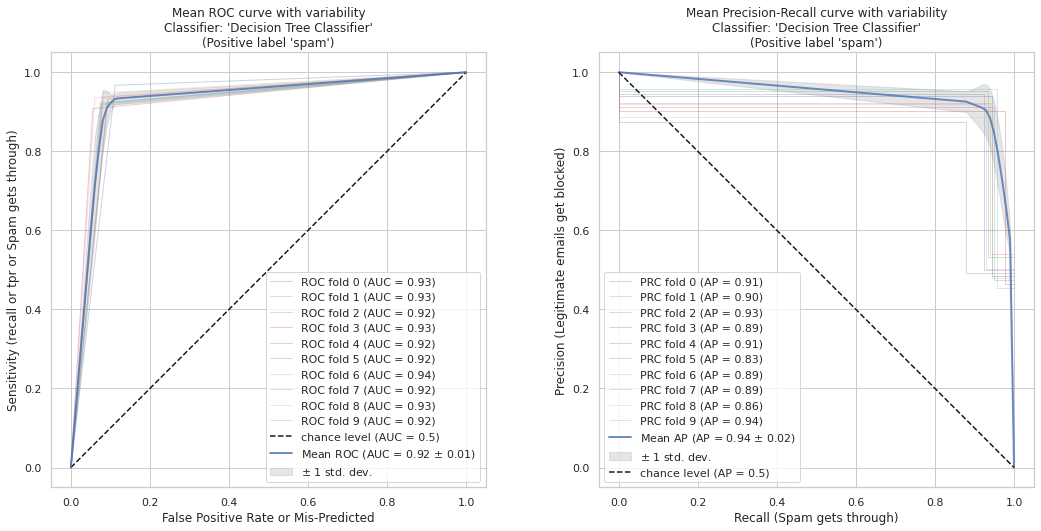

In [55]:
from sklearn.metrics import average_precision_score, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import numpy as np
import matplotlib.pyplot as plt

# The positive label refers to the class "spam" (indicating an email is spam), 
# and the negative label refers to the class "ham" (indicating an email is not spam or legitimate).
target_names = ["ham", "spam"] 
k = 10
skfolds = StratifiedKFold(n_splits=k, shuffle=True)

dtclf = DecisionTreeClassifier(random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
classifier = 'Decision Tree Classifier'

# ROC Curve
ax = axs[0]
for i, (Tr_idx, Te_idx) in enumerate(skfolds.split(X_Tr, y_Tr)):
    Xs_Tr, Xs_Te = X.iloc[Tr_idx], X.iloc[Te_idx]
    ys_Tr, ys_Te = y.iloc[Tr_idx], y.iloc[Te_idx]
    
    def dtclf_model():
        dtclf.fit(Xs_Tr, ys_Tr)
    
    dtclf_model()
    viz = RocCurveDisplay.from_estimator(
        dtclf,
        Xs_Te,
        ys_Te,
        name=f"ROC fold {i}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.average(aucs)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate or Mis-Predicted",
    ylabel="Sensitivity (recall or tpr or Spam gets through)",
    title=f"Mean ROC curve with variability\nClassifier: '{classifier}'\n(Positive label '{target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower right")

# Precision-Recall Curve
tprs = []
aprecs = []
ax = axs[1]
for i, (Tr_idx, Te_idx) in enumerate(skfolds.split(X_Tr, y_Tr)):
    Xs_Tr, Xs_Te = X.iloc[Tr_idx], X.iloc[Te_idx]
    ys_Tr, ys_Te = y.iloc[Tr_idx], y.iloc[Te_idx]
    
    def dtclf_model():
        dtclf.fit(Xs_Tr, ys_Tr)
    
    dtclf_model()
    viz = PrecisionRecallDisplay.from_estimator(
        dtclf, Xs_Te, ys_Te,
        name=f"PRC fold {i}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )    
    interp_precision = np.interp(mean_recall, viz.recall[::-1], viz.precision[::-1])
    interp_precision[0] = 1.0
    tprs.append(interp_precision)
    aprecs.append(average_precision_score(ys_Te, gaussnb.predict_proba(Xs_Te)[:, 1]))

mean_precision = np.mean(tprs, axis=0)
mean_precision[-1] = 0.0
mean_ap = np.mean(aprecs)
std_ap = np.std(aprecs)
ax.plot(
    mean_recall,
    mean_precision,
    color="b",
    label=r"Mean AP (AP = %0.2f $\pm$ %0.2f)" % (mean_ap, std_ap),
    lw=2,
    alpha=0.8,
)
std_precision = np.std(tprs, axis=0)
precisions_upper = np.minimum(mean_precision + std_precision, 1)
precisions_lower = np.maximum(mean_precision - std_precision, 0)
ax.fill_between(
    mean_recall,
    precisions_lower,
    precisions_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)
ax.plot(
    [mean_recall[0], mean_recall[-1]],
    [mean_precision[0], mean_precision[-1]],
    "k--",
    label="chance level (AP = 0.5)",
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="Recall (Spam gets through)",
    ylabel="Precision (Legitimate emails get blocked)",
    title=f"Mean Precision-Recall curve with variability\nClassifier: '{classifier}'\n(Positive label '{target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower left")

# Save the plot with high resolution
plt.savefig("roc_precision_recall_plot.png", dpi=300)
plt.show()

#################################################################################################
                     Test Fold: 1 (future context)                                           
#################################################################################################
----------------------------------------------------------------
Classification performance table Summary as per Flach, Table 2.3
--------------------------------------------------------------------------------------------------------
Measure                                                                              : Value
--------------------------------------------------------------------------------------------------------
number of positives        (Pos)                                                     : 173
number of negatives        (Neg)                                                     : 195
number of true negatives   (TN)                                                      : 155
numb

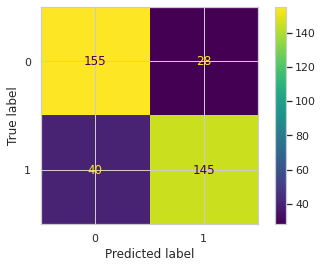

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.84      0.78      0.81       185
class non-spam e-mails       0.79      0.85      0.82       183

              accuracy                           0.82       368
             macro avg       0.82      0.82      0.82       368
          weighted avg       0.82      0.82      0.82       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.82
Performance measure: F1_score  : 0.82
Model Training time (sec)      : 0.0030
#################################################################################################
###########################

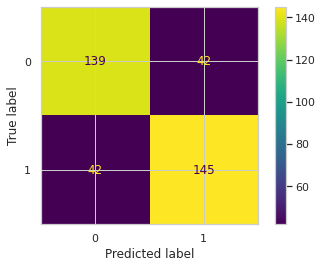

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.78      0.78      0.78       187
class non-spam e-mails       0.77      0.77      0.77       181

              accuracy                           0.77       368
             macro avg       0.77      0.77      0.77       368
          weighted avg       0.77      0.77      0.77       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.77
Performance measure: F1_score  : 0.77
Model Training time (sec)      : 0.0033
#################################################################################################
###########################

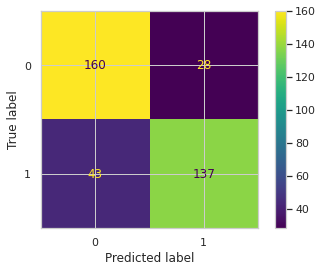

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.83      0.76      0.79       180
class non-spam e-mails       0.79      0.85      0.82       188

              accuracy                           0.81       368
             macro avg       0.81      0.81      0.81       368
          weighted avg       0.81      0.81      0.81       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.81
Performance measure: F1_score  : 0.81
Model Training time (sec)      : 0.0030
#################################################################################################
###########################

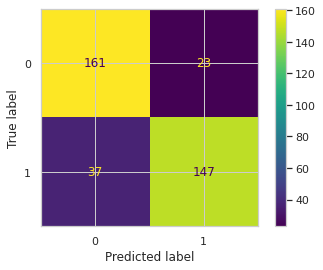

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.86      0.80      0.83       184
class non-spam e-mails       0.81      0.88      0.84       184

              accuracy                           0.84       368
             macro avg       0.84      0.84      0.84       368
          weighted avg       0.84      0.84      0.84       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.84
Performance measure: F1_score  : 0.84
Model Training time (sec)      : 0.0033
#################################################################################################
###########################

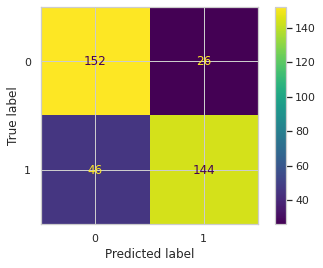

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.85      0.76      0.80       190
class non-spam e-mails       0.77      0.85      0.81       178

              accuracy                           0.80       368
             macro avg       0.81      0.81      0.80       368
          weighted avg       0.81      0.80      0.80       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.80
Performance measure: F1_score  : 0.80
Model Training time (sec)      : 0.0031
#################################################################################################
###########################

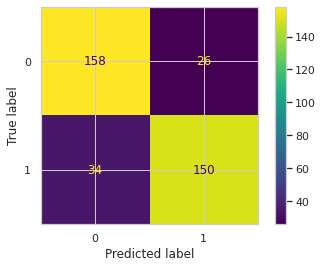

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.85      0.82      0.83       184
class non-spam e-mails       0.82      0.86      0.84       184

              accuracy                           0.84       368
             macro avg       0.84      0.84      0.84       368
          weighted avg       0.84      0.84      0.84       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.84
Performance measure: F1_score  : 0.84
Model Training time (sec)      : 0.0031
#################################################################################################
###########################

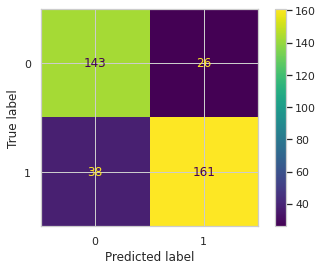

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.86      0.81      0.83       199
class non-spam e-mails       0.79      0.85      0.82       169

              accuracy                           0.83       368
             macro avg       0.83      0.83      0.83       368
          weighted avg       0.83      0.83      0.83       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.83
Performance measure: F1_score  : 0.83
Model Training time (sec)      : 0.0032
#################################################################################################
###########################

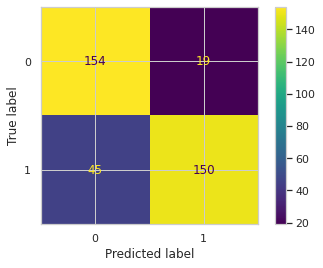

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.89      0.77      0.82       195
class non-spam e-mails       0.77      0.89      0.83       173

              accuracy                           0.83       368
             macro avg       0.83      0.83      0.83       368
          weighted avg       0.83      0.83      0.83       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.83
Performance measure: F1_score  : 0.83
Model Training time (sec)      : 0.0029
#################################################################################################
###########################

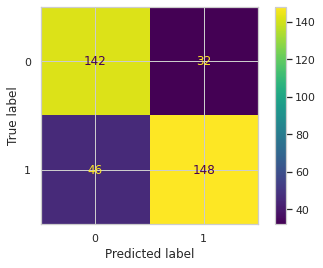

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.82      0.76      0.79       194
class non-spam e-mails       0.76      0.82      0.78       174

              accuracy                           0.79       368
             macro avg       0.79      0.79      0.79       368
          weighted avg       0.79      0.79      0.79       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.79
Performance measure: F1_score  : 0.79
Model Training time (sec)      : 0.0033
#################################################################################################
###########################

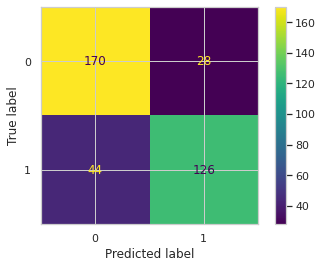

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.82      0.74      0.78       170
class non-spam e-mails       0.79      0.86      0.83       198

              accuracy                           0.80       368
             macro avg       0.81      0.80      0.80       368
          weighted avg       0.81      0.80      0.80       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.80
Performance measure: F1_score  : 0.80
Model Training time (sec)      : 0.0037
#################################################################################################
###########################

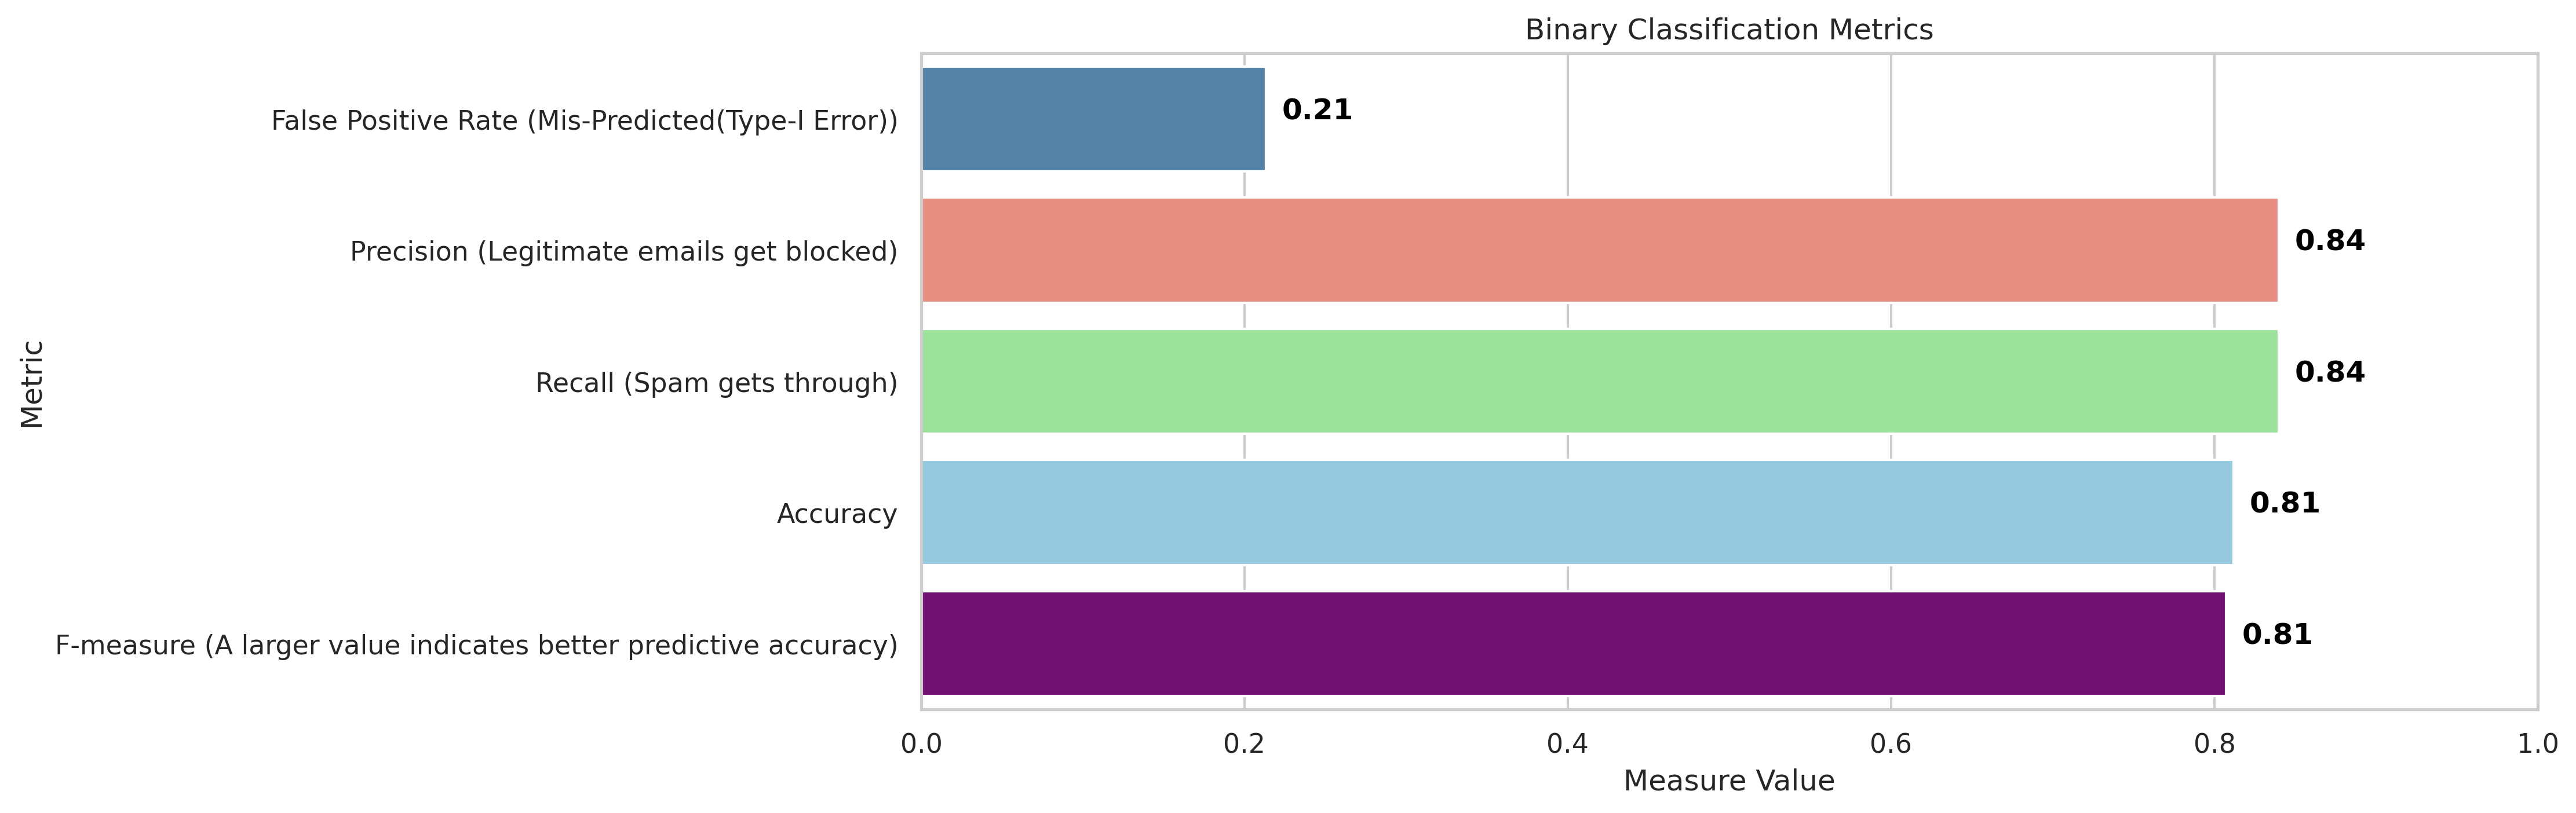

In [56]:
# Process (repeated 'k' times until each fold has been used for testing once...)
#1. Randomly partition the data in k parts or 'folds'
#2. Set one fold aside for testing, train the model on the remaining k-folds and evaluate it on the test fold
#F1 = 2 * (precision * recall) / (precision + recall)
k=10
nneighbors = 15
nnclf = neighbors.KNeighborsClassifier(nneighbors, weights= 'distance')
skfolds = StratifiedKFold(n_splits=10, shuffle = True) #Stratified K-Folds cross-validator
#accuracy of model
nn_eval_acc        = []
#F measure of the model
nn_eval_fmeasure   = []
#Training time of the model
nn_eval_trainTimes = []
# AUC scores
auc_scores = []
# Initialize an empty list to store the fold numbers
fold_numbers = []
#Precision of the model
nn_eval_prec   = []
#Recall of the model
nn_eval_recall   = []
#fpr of the model
nn_eval_fpr   = []
#tpr of the model
nn_eval_tpr   = []
#tpr of the model
nn_eval_tpr   = []
#tnr of the model
nn_eval_tnr   = []
#fnr of the model
nn_eval_fnr   = []

for i, (Tr_idx, Te_idx) in enumerate(skfolds.split(X_Tr,y_Tr)):
    Xs_Tr, Xs_Te = X.iloc[Tr_idx], X.iloc[Te_idx]
    ys_Tr, ys_Te = y.iloc[Tr_idx], y.iloc[Te_idx]
    def nneighborsClfModel():
        nnclf.fit(Xs_Tr, ys_Tr)
        
    if __name__ == '__main__':
        training_time = timeit.timeit("nneighborsClfModel()", setup="from __main__ import nneighborsClfModel", number=1) #TrainingTime(sec)
        nn_eval_trainTimes.append(training_time)
    ys_pred = nnclf.predict(Xs_Te)
    # Calculate the AUC score for the current fold
    auc = roc_auc_score(ys_Te, ys_pred)
    # Append the AUC score to the list
    auc_scores.append(auc)
    target_nm = ['class spam e-mails', 'class non-spam e-mails']
    conf_matrix = confusion_matrix(ys_Te, ys_pred, labels=[1, 0])
    #Classification performance table Summary as per Flach, Table 2.3
    TN, FP, FN, TP = confusion_matrix(ys_Te, ys_pred, labels=[1, 0]).ravel()
    Te_size = ys_Te.size
    Pos  = (TP + FP)
    Neg  = (TN + FN)
    pos  = Pos/ys_Te.size
    neg  = Neg/ys_Te.size
    clr  = pos/neg
    tpr  = TP/Pos #sensitivity or positive recall
    tnr  = TN/Neg #specificity or negative recall
    fpr  = 1-tnr #false alarm rate
    fnr  = 1-tpr
    prec = TP/(TP+FP) #confidence
    rec  = TP/(TP+FN) #recall
    Fm   = (FP+FN)/2 #arithmatic mean
    Fmeasure = 2/((1/prec)+(1/rec))
    acc  = (pos*tpr)+(neg*tnr)
    err  = 1-acc
    print(f"#################################################################################################")
    print(f"                     Test Fold: {i+1} (future context)                                           ")
    print(f"#################################################################################################")
    print(f"----------------------------------------------------------------")
    print(f"Classification performance table Summary as per Flach, Table 2.3")
    print(f"--------------------------------------------------------------------------------------------------------")
    print(f"Measure                                                                              : Value")
    print(f"--------------------------------------------------------------------------------------------------------")
    print(f"number of positives        (Pos)                                                     : {Pos}")
    print(f"number of negatives        (Neg)                                                     : {Neg}")
    print(f"number of true negatives   (TN)                                                      : {TN}")
    print(f"number of false positives  (FP)                                                      : {FP}")
    print(f"number of flase negatives  (FN)                                                      : {FN}")
    print(f"number of true positives   (TP)                                                      : {TP}")
    print(f"proportion of positives    (pos)                                                     : {format(pos,'.2f')}")
    print(f"proportion of negatives    (neg)                                                     : {format(neg,'.2f')}")
    print(f"class ratio                (clr)                                                     : {format(clr,'.2f')}")
    print(f"error rate                 (err)                                                     : {format(err,'.2f')}")
    print(f"true positive rate         (tpr)                                                     : {format(tpr,'.2f')}")
    print(f"true negative rate         (tnr)                                                     : {format(tnr,'.2f')}")
    print(f"false positive rate        (fpr)                                                     : {format(fpr,'.2f')}")
    print(f"false negative rate        (fnr)                                                     : {format(fnr,'.2f')}")
    print(f"precision or confidence    (prec)                                                    : {format(prec,'.2f')}")
    print(f"recall                     (rec)                                                     : {format(rec,'.2f')}")
    print(f"arithmatic mean            (Fm)                                                      : {format(Fm,'.2f')}")
    print(f"accuracy                   (acc)                                                     : {format(acc,'.2f')}")
    print(f"F-measure or The harmonic mean of precision and recall (background 10.1) (Fmeasure)) : {format(Fmeasure,'.2f')}")
    print(f"---------------------------------------------------------------------------------------------------------------")
    print(f"------------Sufficient set of measurements as per ML Flach, Table 2.3------------------------------------------")
    print(f"---------------------------------------------------------------------------------------------------------------")
    print(f"Size of the Test set       (Te_size)     : {Te_size}")
    print(f"class distribution         (clr)         : {format(clr,'.2f')}")
    print(f"true positive rate         (tpr)         : {format(tpr,'.2f')}")
    print(f"true negative rate         (tnr)         : {format(tnr,'.2f')}")
    print(f"false positive rate        (fpr)         : {format(fpr,'.2f')}")
    print(f"false negative rate        (fnr)         : {format(fnr,'.2f')}")
    print(f"accuracy                   (acc)         : {format(acc,'.2f')}")
    print(f"F-measure or harmonic mean (Fmeasure))   : {format(Fmeasure,'.2f')}")
    print(f"Model Training time (sec)                : {format(training_time,'.4f')}")
    print(f"-------------------------------------------------------------------")
    nn_eval_acc.append(acc)
    nn_eval_fmeasure.append(Fmeasure)
    nn_eval_prec.append(prec)
    nn_eval_recall.append(tpr)
    nn_eval_tpr.append(tpr)
    nn_eval_fpr.append(fpr)
    nn_eval_tnr.append(tnr)
    nn_eval_fnr.append(fnr)
    print(f"--------------------------------------------------------------------------------------------")
    print(f"Assessing Classification performance via contingency table or confusion matrix:")
    print(f"--------------------------------------------------------------------------------------------")
    print(f"confusion matrix: {conf_matrix}")
    print(f"--------------------------------------------------------------------------------------------")
    print(f"                  Confusion Matrix Display Plot                                             ")
    print(f"--------------------------------------------------------------------------------------------")
    confMatDisp = ConfusionMatrixDisplay(conf_matrix)
    confMatDisp.plot()
    plt.show()
    print(f"--------------------------------------------------------------------------------------------")
    print(f"        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               ")
    print(f"--------------------------------------------------------------------------------------------")
    print(classification_report(ys_Te, ys_pred, target_names = target_nm)) #, labels=[0,1]
    print(f"--------------------------------------------------------------------------------------------")
    print(f"Evalution Measure  : accuracy  : {format(accuracy_score(ys_Te, ys_pred),'.2f')}")
    #print(f"f1_score: {f1_score(ys_Te, ys_pred, average=None)}")
    print(f"Performance measure: F1_score  : {format(f1_score(ys_Te, ys_pred, average=None).mean(),'.2f')}")
    #print(precision_recall_fscore_support(ys_Te, ys_pred, average=None))
    print(f"Model Training time (sec)      : {format(training_time,'.4f')}")
    print(f"#################################################################################################")
    
print(f"#####################################################################")
print(f"Binary Classification Metrics: Nearest Neighbors Classification Model")
print(f"#####################################################################")
avg_accuracy = np.average(nn_eval_acc)
avg_fmeasure = np.average(nn_eval_fmeasure)
avg_prec     = np.average(nn_eval_prec)
avg_recall   = np.average(nn_eval_recall)
avg_fpr      = np.average(nn_eval_fpr)
avg_tpr      = np.average(nn_eval_tpr)
avg_tnr      = np.average(nn_eval_tnr)
avg_fnr      = np.average(nn_eval_fnr)
avg_auc      = np.average(auc_scores)
# Sample data
measure_names = ['False Positive Rate (Mis-Predicted(Type-I Error))', 'Precision (Legitimate emails get blocked)', 'Recall (Spam gets through)', 'Accuracy', 'F-measure (A larger value indicates better predictive accuracy)']
measure_values = [avg_fpr, avg_prec, avg_recall, avg_accuracy, avg_fmeasure]
slider_limits = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]
bar_colors = ['steelblue', 'salmon', 'lightgreen', 'skyblue', 'purple' ]
# Create slider plot
create_slider_plot(measure_names, measure_values, slider_limits, bar_colors)

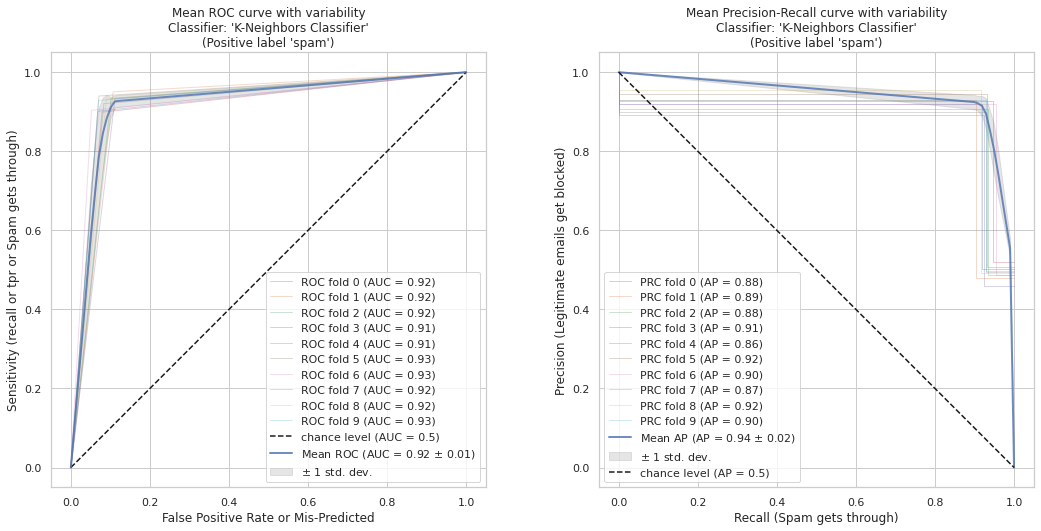

In [57]:
from sklearn.metrics import average_precision_score, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import numpy as np
import matplotlib.pyplot as plt

# The positive label refers to the class "spam" (indicating an email is spam), 
# and the negative label refers to the class "ham" (indicating an email is not spam or legitimate).
target_names = ["ham", "spam"] 
k = 10
skfolds = StratifiedKFold(n_splits=k, shuffle=True)

dtclf = DecisionTreeClassifier(random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
classifier = 'K-Neighbors Classifier'

# ROC Curve
ax = axs[0]
for i, (Tr_idx, Te_idx) in enumerate(skfolds.split(X_Tr, y_Tr)):
    Xs_Tr, Xs_Te = X.iloc[Tr_idx], X.iloc[Te_idx]
    ys_Tr, ys_Te = y.iloc[Tr_idx], y.iloc[Te_idx]
    
    def dtclf_model():
        dtclf.fit(Xs_Tr, ys_Tr)
    
    dtclf_model()
    viz = RocCurveDisplay.from_estimator(
        dtclf,
        Xs_Te,
        ys_Te,
        name=f"ROC fold {i}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.average(aucs)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate or Mis-Predicted",
    ylabel="Sensitivity (recall or tpr or Spam gets through)",
    title=f"Mean ROC curve with variability\nClassifier: '{classifier}'\n(Positive label '{target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower right")

# Precision-Recall Curve
tprs = []
aprecs = []
ax = axs[1]
for i, (Tr_idx, Te_idx) in enumerate(skfolds.split(X_Tr, y_Tr)):
    Xs_Tr, Xs_Te = X.iloc[Tr_idx], X.iloc[Te_idx]
    ys_Tr, ys_Te = y.iloc[Tr_idx], y.iloc[Te_idx]
    
    def dtclf_model():
        dtclf.fit(Xs_Tr, ys_Tr)
    
    dtclf_model()
    viz = PrecisionRecallDisplay.from_estimator(
        dtclf, Xs_Te, ys_Te,
        name=f"PRC fold {i}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )    
    interp_precision = np.interp(mean_recall, viz.recall[::-1], viz.precision[::-1])
    interp_precision[0] = 1.0
    tprs.append(interp_precision)
    aprecs.append(average_precision_score(ys_Te, gaussnb.predict_proba(Xs_Te)[:, 1]))

mean_precision = np.mean(tprs, axis=0)
mean_precision[-1] = 0.0
mean_ap = np.mean(aprecs)
std_ap = np.std(aprecs)
ax.plot(
    mean_recall,
    mean_precision,
    color="b",
    label=r"Mean AP (AP = %0.2f $\pm$ %0.2f)" % (mean_ap, std_ap),
    lw=2,
    alpha=0.8,
)
std_precision = np.std(tprs, axis=0)
precisions_upper = np.minimum(mean_precision + std_precision, 1)
precisions_lower = np.maximum(mean_precision - std_precision, 0)
ax.fill_between(
    mean_recall,
    precisions_lower,
    precisions_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)
ax.plot(
    [mean_recall[0], mean_recall[-1]],
    [mean_precision[0], mean_precision[-1]],
    "k--",
    label="chance level (AP = 0.5)",
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="Recall (Spam gets through)",
    ylabel="Precision (Legitimate emails get blocked)",
    title=f"Mean Precision-Recall curve with variability\nClassifier: '{classifier}'\n(Positive label '{target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower left")

# Save the plot with high resolution
plt.savefig("roc_precision_recall_plot.png", dpi=300)
plt.show()

In [58]:
#evaluation of accuracies
#CrossValidation table as per Example 12.4 (Cross-validation)
n = 10 # No Of Random Variables
cvdf = {'Fold' : [x+1 for x in range(10)],'NaiveBayes' :nb_eval_acc  ,'DecisionTree' :dt_eval_acc ,'NearestNeighbour' :nn_eval_acc }
df_acc_cv = pd.DataFrame(data=cvdf)
df_acc_cv_nb_avg = np.average(df_acc_cv['NaiveBayes']) # Sample Mean
df_acc_cv_dt_avg = np.average(df_acc_cv['DecisionTree'])
df_acc_cv_nn_avg = np.average(df_acc_cv['NearestNeighbour'])
df_acc_cv_nb_std = np.sqrt(np.sum((df_acc_cv['NaiveBayes']-df_acc_cv_nb_avg)**2)/(n-1)) # Sample standard deviation, The reason for using n-1 as divisor rather than the more obvious choice n will become 
df_acc_cv_dt_std = np.sqrt(np.sum((df_acc_cv['DecisionTree']-df_acc_cv_dt_avg)**2)/(n-1)) #np.std(df_acc_cv['DecisionTree'])
df_acc_cv_nn_std = np.sqrt(np.sum((df_acc_cv['NearestNeighbour']-df_acc_cv_dt_avg)**2)/(n-1)) #np.std(df_acc_cv['NearestNeighbour'])
model_avg = [df_acc_cv_nb_avg,df_acc_cv_dt_avg,df_acc_cv_nn_avg]
model_std = [df_acc_cv_nb_std,df_acc_cv_dt_std,df_acc_cv_nn_std]
avg_row = pd.DataFrame({'Fold':'avg', 'NaiveBayes':df_acc_cv_nb_avg, 'DecisionTree': df_acc_cv_dt_avg, 'NearestNeighbour': df_acc_cv_nn_avg}, index=[11])
std_row = pd.DataFrame({'Fold':'std', 'NaiveBayes':df_acc_cv_nb_std, 'DecisionTree': df_acc_cv_dt_std, 'NearestNeighbour': df_acc_cv_nn_std}, index=[12])
#Appending the new avearge and standard deviation rows to the CrossValidation data frame
df_12_4_accuracies = pd.concat([df_acc_cv,avg_row], ignore_index=True)
df_12_4_accuracies = pd.concat([df_12_4_accuracies,std_row], ignore_index=True)
df_12_4_accuracies

,Fold,NaiveBayes,DecisionTree,NearestNeighbour
0,1,0.891304,0.921196,0.815217
1,2,0.885870,0.904891,0.771739
2,3,0.891304,0.910326,0.807065
3,4,0.831522,0.918478,0.836957
4,5,0.864130,0.915761,0.804348
5,6,0.885870,0.951087,0.836957
6,7,0.869565,0.921196,0.826087
7,8,0.869565,0.904891,0.826087
8,9,0.858696,0.937500,0.788043
9,10,0.875000,0.937500,0.804348


In [59]:
#evaluation of f-measures
#CrossValidation table as per Example 12.4 (Cross-validation)
n = 10 # No Of Random Variables
cvdf = {'Fold' : [x+1 for x in range(10)],'NaiveBayes' :nb_eval_fmeasure  ,'DecisionTree' :dt_eval_fmeasure ,'NearestNeighbour' :nn_eval_fmeasure }
df_fmea_cv = pd.DataFrame(data=cvdf)
df_fmea_cv_nb_avg = np.average(df_fmea_cv['NaiveBayes']) # Sample Mean
df_fmea_cv_dt_avg = np.average(df_fmea_cv['DecisionTree'])
df_fmea_cv_nn_avg = np.average(df_fmea_cv['NearestNeighbour'])
df_fmea_cv_nb_std = np.sqrt(np.sum((df_fmea_cv['NaiveBayes']-df_fmea_cv_nb_avg)**2)/(n-1)) # Sample standard deviation, The reason for using n-1 as divisor rather than the more obvious choice n will become 
df_fmea_cv_dt_std = np.sqrt(np.sum((df_fmea_cv['DecisionTree']-df_fmea_cv_dt_avg)**2)/(n-1)) #np.std(df_acc_cv['DecisionTree'])
df_fmea_cv_nn_std = np.sqrt(np.sum((df_fmea_cv['NearestNeighbour']-df_fmea_cv_dt_avg)**2)/(n-1)) #np.std(df_acc_cv['NearestNeighbour'])
model_avg = [df_fmea_cv_nb_avg,df_fmea_cv_dt_avg,df_fmea_cv_nn_avg]
model_std = [df_fmea_cv_nb_std,df_fmea_cv_dt_std,df_fmea_cv_nn_std]
avg_row = pd.DataFrame({'Fold':'avg', 'NaiveBayes':df_fmea_cv_nb_avg, 'DecisionTree': df_fmea_cv_dt_avg, 'NearestNeighbour': df_fmea_cv_nn_avg}, index=[11])
std_row = pd.DataFrame({'Fold':'std', 'NaiveBayes':df_fmea_cv_nb_std, 'DecisionTree': df_fmea_cv_dt_std, 'NearestNeighbour': df_fmea_cv_nn_std}, index=[12])
#Appending the new avearge and standard deviation rows to the CrossValidation data frame
df_12_4_fmeasures = pd.concat([df_fmea_cv,avg_row], ignore_index=True)
df_12_4_fmeasures = pd.concat([df_12_4_fmeasures,std_row], ignore_index=True)
df_12_4_fmeasures

,Fold,NaiveBayes,DecisionTree,NearestNeighbour
0,1,0.880952,0.924282,0.810056
1,2,0.883978,0.899135,0.775401
2,3,0.890110,0.910569,0.794203
3,4,0.813253,0.918919,0.830508
4,5,0.858757,0.922306,0.800000
5,6,0.875000,0.950276,0.833333
6,7,0.856287,0.919668,0.834197
7,8,0.870270,0.909561,0.824176
8,9,0.850575,0.932945,0.791444
9,10,0.841379,0.943210,0.777778


In [60]:
#evaluation of training times
#CrossValidation table as per Example 12.4 (Cross-validation)
n = 10 # No Of Random Variables
cvdf = {'Fold' : [x+1 for x in range(10)],'NaiveBayes' :nb_eval_trainTimes  ,'DecisionTree' :dt_eval_trainTimes ,'NearestNeighbour' :nn_eval_trainTimes }
df_ttimes_cv = pd.DataFrame(data=cvdf)
df_ttimes_cv_nb_avg = np.average(df_ttimes_cv['NaiveBayes']) # Sample Mean
df_ttimes_cv_dt_avg = np.average(df_ttimes_cv['DecisionTree'])
df_ttimes_cv_nn_avg = np.average(df_ttimes_cv['NearestNeighbour'])
df_ttimes_cv_nb_std = np.sqrt(np.sum((df_ttimes_cv['NaiveBayes']-df_ttimes_cv_nb_avg)**2)/(n-1)) # Sample standard deviation, The reason for using n-1 as divisor rather than the more obvious choice n will become 
df_ttimes_cv_dt_std = np.sqrt(np.sum((df_ttimes_cv['DecisionTree']-df_ttimes_cv_dt_avg)**2)/(n-1)) #np.std(df_acc_cv['DecisionTree'])
df_ttimes_cv_nn_std = np.sqrt(np.sum((df_ttimes_cv['NearestNeighbour']-df_ttimes_cv_dt_avg)**2)/(n-1)) #np.std(df_acc_cv['NearestNeighbour'])
model_avg = [df_ttimes_cv_nb_avg,df_ttimes_cv_dt_avg,df_ttimes_cv_nn_avg]
model_std = [df_ttimes_cv_nb_std,df_ttimes_cv_dt_std,df_ttimes_cv_nn_std]
avg_row = pd.DataFrame({'Fold':'avg', 'NaiveBayes':df_ttimes_cv_nb_avg, 'DecisionTree': df_ttimes_cv_dt_avg, 'NearestNeighbour': df_ttimes_cv_nn_avg}, index=[11])
std_row = pd.DataFrame({'Fold':'std', 'NaiveBayes':df_ttimes_cv_nb_std, 'DecisionTree': df_ttimes_cv_dt_std, 'NearestNeighbour': df_ttimes_cv_nn_std}, index=[12])
#Appending the new avearge and standard deviation rows to the CrossValidation data frame
df_12_4_ttimes = pd.concat([df_ttimes_cv,avg_row], ignore_index=True)
df_12_4_ttimes = pd.concat([df_12_4_ttimes,std_row], ignore_index=True)
df_12_4_ttimes

,Fold,NaiveBayes,DecisionTree,NearestNeighbour
0,1,0.008687,0.063107,0.003016
1,2,0.005765,0.105134,0.003264
2,3,0.013904,0.061620,0.003008
3,4,0.005087,0.073629,0.003273
4,5,0.005537,0.064475,0.003094
5,6,0.005129,0.061261,0.003147
6,7,0.006752,0.058602,0.003163
7,8,0.005004,0.054980,0.002937
8,9,0.005422,0.061300,0.003302
9,10,0.005423,0.067770,0.003660


In [61]:
#accuracies rank the df_cross_validation data as per example 12.8 
df_rank = pd.DataFrame({'DataSet':[i+1 for i in range(10)],'NaiveBayes':df_acc_cv['NaiveBayes'],'NB_rank':pd.cut(df_acc_cv['NaiveBayes'], bins=3, labels=[3,2,1]).to_list(),'DecisionTree':df_acc_cv['DecisionTree'],'DT_rank':pd.cut(df_acc_cv['DecisionTree'], bins=3, labels=[3,2,1]).to_list(), 'NearestNeighbour':df_acc_cv['NearestNeighbour'],'NN_rank':pd.cut(df_acc_cv['NearestNeighbour'], bins=3, labels=[3,2,1]).to_list()})
df_rank_nb_avg = np.average(df_rank['NB_rank'])
df_rank_dt_avg = np.average(df_rank['DT_rank'])
df_rank_nn_avg = np.average(df_rank['NN_rank'])
#ranking_avg = ["",df_rank_nb_avg,"",df_rank_dt_avg,"",df_rank_nn_avg]
avg_row_pd = pd.DataFrame({'DataSet':'avg rank', 'NaiveBayes':"",'NB_rank':df_rank_nb_avg ,'DecisionTree':"" ,'DT_rank':df_rank_dt_avg, 'NearestNeighbour':"",'NN_rank':df_rank_nn_avg }, index=[11])
#Appending the new avearge and standard deviation rows to the CrossValidation data frame
df_rank_avg_12_8_acc = pd.concat([df_rank.copy(),avg_row_pd], ignore_index=True)
#The data are arranged in a two-way table having n=10 rows and k=3 columns
#The rows correspond to the blocks of matched subjects and columns represent the different treatments or algorithms or experiment conditions
#The values in the rows are the ranks of the scores for the different subjects under each of the k=3 algorithms
# The ranks in a row range from 1 to k=3
# The ranks in in each column will be a random sequence of numbers from 1 to k=3, under the assumption that k=3 repeated measures or measures on the matched subjects come from populations having the same distribution...
df_rank_avg_12_8_acc

,DataSet,NaiveBayes,NB_rank,DecisionTree,DT_rank,NearestNeighbour,NN_rank
0,1,0.891304,1.0,0.921196,2.0,0.815217,2.0
1,2,0.88587,1.0,0.904891,3.0,0.771739,3.0
2,3,0.891304,1.0,0.910326,3.0,0.807065,2.0
3,4,0.831522,3.0,0.918478,3.0,0.836957,1.0
4,5,0.86413,2.0,0.915761,3.0,0.804348,2.0
5,6,0.88587,1.0,0.951087,1.0,0.836957,1.0
6,7,0.869565,2.0,0.921196,2.0,0.826087,1.0
7,8,0.869565,2.0,0.904891,3.0,0.826087,1.0
8,9,0.858696,2.0,0.9375,1.0,0.788043,3.0
9,10,0.875,1.0,0.9375,1.0,0.804348,2.0


$                \ The\ Friedman\ Test\ Statistic\             $

$   \ The\ friedman \ statistic \ =\ \frac{12n}{k(k+1)}\sum_{j}(R_{j}-\bar R)^2 \$

In [62]:
#The null hypothesis involves k! = 3! permutations of the ranks 1,2,3 in each row and considers these permutations to be equiprobable.
# The friedman statistic
n = 10
k = 3
avg_rank = (k+1)/2
avg_rank_alg_nb = df_rank_nb_avg
avg_rank_alg_dt = df_rank_dt_avg
avg_rank_alg_nn = df_rank_nn_avg
Friedman_Statistic = ((12*n)/(k*(k+1)))*((avg_rank_alg_nb-avg_rank)**2+(avg_rank_alg_dt-avg_rank)**2+(avg_rank_alg_nn-avg_rank)**2)
print(f"The Friedman Statistic is {format(Friedman_Statistic,'.1f')}")

The Friedman Statistic is 2.4


$   \ The \ Friedman \ statistic \ critical\ value \ with \ N=10 \ , \ k=3 \ leaving \ an \ area \ of \ {\alpha/2} = 0.025 \ is \ F_{0.05} = 7.8 \$

In [63]:
#accuracies rank the df_cross_validation data as per example 12.8 
df_rank = pd.DataFrame({
    'DataSet':[i+1 for i in range(10)],
    'NaiveBayes':df_fmea_cv['NaiveBayes'],
    'NB_rank':pd.cut(df_fmea_cv['NaiveBayes'], bins=3, labels=[3,2,1]).to_list(),
    'DecisionTree':df_fmea_cv['DecisionTree'],
    'DT_rank':pd.cut(df_fmea_cv['DecisionTree'], bins=3, labels=[3,2,1]).to_list(), 
    'NearestNeighbour':df_fmea_cv['NearestNeighbour'],
    'NN_rank':pd.cut(df_fmea_cv['NearestNeighbour'], bins=3, labels=[3,2,1]).to_list()})
df_rank_nb_avg = np.average(df_rank['NB_rank'])
df_rank_dt_avg = np.average(df_rank['DT_rank'])
df_rank_nn_avg = np.average(df_rank['NN_rank'])
#ranking_avg = ["",df_rank_nb_avg,"",df_rank_dt_avg,"",df_rank_nn_avg]
avg_row_pd = pd.DataFrame({'DataSet':'avg rank', 'NaiveBayes':"",'NB_rank':df_rank_nb_avg ,'DecisionTree':"" ,'DT_rank':df_rank_dt_avg, 'NearestNeighbour':"",'NN_rank':df_rank_nn_avg }, index=[11])
#Appending the new avearge and standard deviation rows to the CrossValidation data frame
df_rank_avg_12_8_fmea = pd.concat([df_rank.copy(),avg_row_pd], ignore_index=True)
#The data are arranged in a two-way table having n=10 rows and k=3 columns
#The rows correspond to the blocks of matched subjects and columns represent the different treatments or algorithms or experiment conditions
#The values in the rows are the ranks of the scores for the different subjects under each of the k=3 algorithms
# The ranks in a row range from 1 to k=3
# The ranks in in each column will be a random sequence of numbers from 1 to k=3, under the assumption that k=3 repeated measures or measures on the matched subjects come from populations having the same distribution...
df_rank_avg_12_8_fmea

,DataSet,NaiveBayes,NB_rank,DecisionTree,DT_rank,NearestNeighbour,NN_rank
0,1,0.880952,1.0,0.924282,2.0,0.810056,2.0
1,2,0.883978,1.0,0.899135,3.0,0.775401,3.0
2,3,0.89011,1.0,0.910569,3.0,0.794203,3.0
3,4,0.813253,3.0,0.918919,2.0,0.830508,1.0
4,5,0.858757,2.0,0.922306,2.0,0.8,2.0
5,6,0.875,1.0,0.950276,1.0,0.833333,1.0
6,7,0.856287,2.0,0.919668,2.0,0.834197,1.0
7,8,0.87027,1.0,0.909561,3.0,0.824176,1.0
8,9,0.850575,2.0,0.932945,2.0,0.791444,3.0
9,10,0.841379,2.0,0.94321,1.0,0.777778,3.0


$                \ The\ Friedman\ Test\ Statistic\             $

$   \ The\ friedman \ statistic \ =\ \frac{12n}{k(k+1)}\sum_{j}(R_{j}-\bar R)^2 \$

In [64]:
#The null hypothesis involves k! = 3! permutations of the ranks 1,2,3 in each row and considers these permutations to be equiprobable.
# The friedman statistic
n = 10
k = 3
avg_rank = (k+1)/2
avg_rank_alg_nb = df_rank_nb_avg
avg_rank_alg_dt = df_rank_dt_avg
avg_rank_alg_nn = df_rank_nn_avg
Friedman_Statistic = ((12*n)/(k*(k+1)))*((avg_rank_alg_nb-avg_rank)**2+(avg_rank_alg_dt-avg_rank)**2+(avg_rank_alg_nn-avg_rank)**2)
print(f"The Friedman Statistic is {format(Friedman_Statistic,'.1f')}")

The Friedman Statistic is 1.7


$   \ The \ Friedman \ statistic \ critical\ value \ with \ N=10 \ , \ k=3 \ leaving \ an \ area \ of \ {\alpha/2} = 0.025 \ is \ F_{0.05} = 7.8 \$

In [65]:
#accuracies rank the df_cross_validation data as per example 12.8 
df_rank = pd.DataFrame({'DataSet':[i+1 for i in range(10)],'NaiveBayes':df_ttimes_cv['NaiveBayes'],'NB_rank':pd.cut(df_ttimes_cv['NaiveBayes'], bins=3, labels=[3,2,1]).to_list(),'DecisionTree':df_ttimes_cv['DecisionTree'],'DT_rank':pd.cut(df_ttimes_cv['DecisionTree'], bins=3, labels=[3,2,1]).to_list(), 'NearestNeighbour':df_ttimes_cv['NearestNeighbour'],'NN_rank':pd.cut(df_ttimes_cv['NearestNeighbour'], bins=3, labels=[3,2,1]).to_list()})
df_rank_nb_avg = np.average(df_rank['NB_rank'])
df_rank_dt_avg = np.average(df_rank['DT_rank'])
df_rank_nn_avg = np.average(df_rank['NN_rank'])
#ranking_avg = ["",df_rank_nb_avg,"",df_rank_dt_avg,"",df_rank_nn_avg]
avg_row_pd = pd.DataFrame({'DataSet':'avg rank', 'NaiveBayes':"",'NB_rank':df_rank_nb_avg ,'DecisionTree':"" ,'DT_rank':df_rank_dt_avg, 'NearestNeighbour':"",'NN_rank':df_rank_nn_avg }, index=[11])
#Appending the new avearge and standard deviation rows to the CrossValidation data frame
df_rank_avg_12_8_ttimes = pd.concat([df_rank.copy(),avg_row_pd], ignore_index=True)
#The data are arranged in a two-way table having n=10 rows and k=3 columns
#The rows correspond to the blocks of matched subjects and columns represent the different treatments or algorithms or experiment conditions
#The values in the rows are the ranks of the scores for the different subjects under each of the k=3 algorithms
# The ranks in a row range from 1 to k=3
# The ranks in in each column will be a random sequence of numbers from 1 to k=3, under the assumption that k=3 repeated measures or measures on the matched subjects come from populations having the same distribution...
df_rank_avg_12_8_ttimes

,DataSet,NaiveBayes,NB_rank,DecisionTree,DT_rank,NearestNeighbour,NN_rank
0,1,0.008687,2.0,0.063107,3.0,0.003016,3.0
1,2,0.005765,3.0,0.105134,1.0,0.003264,2.0
2,3,0.013904,1.0,0.06162,3.0,0.003008,3.0
3,4,0.005087,3.0,0.073629,2.0,0.003273,2.0
4,5,0.005537,3.0,0.064475,3.0,0.003094,3.0
5,6,0.005129,3.0,0.061261,3.0,0.003147,3.0
6,7,0.006752,3.0,0.058602,3.0,0.003163,3.0
7,8,0.005004,3.0,0.05498,3.0,0.002937,3.0
8,9,0.005422,3.0,0.0613,3.0,0.003302,2.0
9,10,0.005423,3.0,0.06777,3.0,0.00366,1.0


$                \ The\ Friedman\ Test\ Statistic\             $

$   \ The\ friedman \ statistic \ =\ \frac{12n}{k(k+1)}\sum_{j}(R_{j}-\bar R)^2 \$

In [66]:
#The null hypothesis involves k! = 3! permutations of the ranks 1,2,3 in each row and considers these permutations to be equiprobable.
# The friedman statistic
n = 10
k = 3
avg_rank = (k+1)/2
avg_rank_alg_nb = df_rank_nb_avg
avg_rank_alg_dt = df_rank_dt_avg
avg_rank_alg_nn = df_rank_nn_avg
Friedman_Statistic = ((12*n)/(k*(k+1)))*((avg_rank_alg_nb-avg_rank)**2+(avg_rank_alg_dt-avg_rank)**2+(avg_rank_alg_nn-avg_rank)**2)
print(f"The Friedman Statistic is {format(Friedman_Statistic,'.1f')}")

The Friedman Statistic is 12.3


$   \ The \ Friedman \ statistic \ critical\ value \ with \ N=10 \ , \ k=3 \ leaving \ an \ area \ of \ {\alpha/2} = 0.025 \ is \ F_{0.05} = 7.8 \$

In [70]:
# Delete duplicated rows
spam_df = spam_df.drop_duplicates()

In [71]:
# Verify the removal
duplicate_count = spam_df.duplicated().sum()
print("Duplicate rows after removal:", duplicate_count)

Duplicate rows after removal: 0


In [72]:
spam_df.shape

(4209, 58)

In [79]:
X_Tr, X_Te, y_Tr, y_Te = train_test_split(X, y, test_size = 0.2, random_state = 42) #Tr- Training, Te-Test

#################################################################################################
                     Test Fold: 1 (future context)                                           
#################################################################################################
----------------------------------------------------------------
Classification performance table Summary as per Flach, Table 2.3
--------------------------------------------------------------------------------------------------------------------------------------
Measure                                                                                                          : Value              
--------------------------------------------------------------------------------------------------------------------------------------
number of positives        (Pos)                                                                                 : 155
number of negatives        (Neg)                        

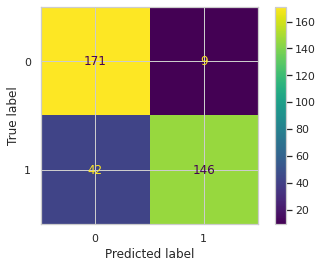

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.94      0.78      0.85       188
class non-spam e-mails       0.80      0.95      0.87       180

              accuracy                           0.86       368
             macro avg       0.87      0.86      0.86       368
          weighted avg       0.87      0.86      0.86       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.86
Performance measure: F1_score  : 0.86
Model Training time (sec)      : 0.0065
#################################################################################################
###########################

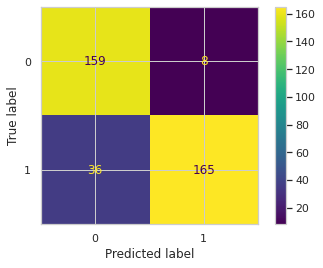

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.95      0.82      0.88       201
class non-spam e-mails       0.82      0.95      0.88       167

              accuracy                           0.88       368
             macro avg       0.88      0.89      0.88       368
          weighted avg       0.89      0.88      0.88       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.88
Performance measure: F1_score  : 0.88
Model Training time (sec)      : 0.0072
#################################################################################################
###########################

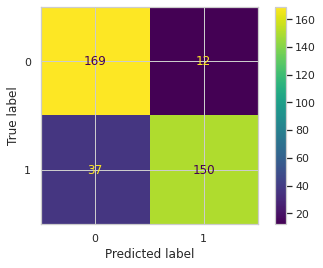

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.93      0.80      0.86       187
class non-spam e-mails       0.82      0.93      0.87       181

              accuracy                           0.87       368
             macro avg       0.87      0.87      0.87       368
          weighted avg       0.87      0.87      0.87       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.87
Performance measure: F1_score  : 0.87
Model Training time (sec)      : 0.0060
#################################################################################################
###########################

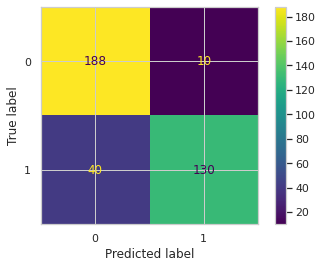

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.93      0.76      0.84       170
class non-spam e-mails       0.82      0.95      0.88       198

              accuracy                           0.86       368
             macro avg       0.88      0.86      0.86       368
          weighted avg       0.87      0.86      0.86       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.86
Performance measure: F1_score  : 0.86
Model Training time (sec)      : 0.0050
#################################################################################################
###########################

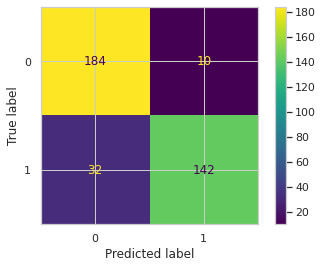

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.93      0.82      0.87       174
class non-spam e-mails       0.85      0.95      0.90       194

              accuracy                           0.89       368
             macro avg       0.89      0.88      0.88       368
          weighted avg       0.89      0.89      0.89       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.89
Performance measure: F1_score  : 0.88
Model Training time (sec)      : 0.0055
#################################################################################################
###########################

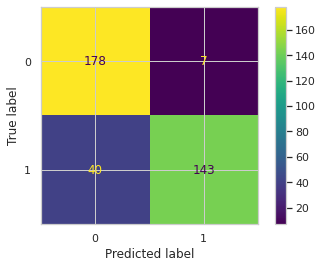

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.95      0.78      0.86       183
class non-spam e-mails       0.82      0.96      0.88       185

              accuracy                           0.87       368
             macro avg       0.88      0.87      0.87       368
          weighted avg       0.88      0.87      0.87       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.87
Performance measure: F1_score  : 0.87
Model Training time (sec)      : 0.0047
#################################################################################################
###########################

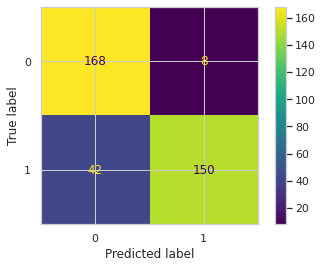

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.95      0.78      0.86       192
class non-spam e-mails       0.80      0.95      0.87       176

              accuracy                           0.86       368
             macro avg       0.87      0.87      0.86       368
          weighted avg       0.88      0.86      0.86       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.86
Performance measure: F1_score  : 0.86
Model Training time (sec)      : 0.0047
#################################################################################################
###########################

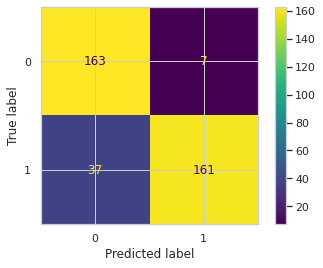

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.96      0.81      0.88       198
class non-spam e-mails       0.81      0.96      0.88       170

              accuracy                           0.88       368
             macro avg       0.89      0.89      0.88       368
          weighted avg       0.89      0.88      0.88       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.88
Performance measure: F1_score  : 0.88
Model Training time (sec)      : 0.0048
#################################################################################################
###########################

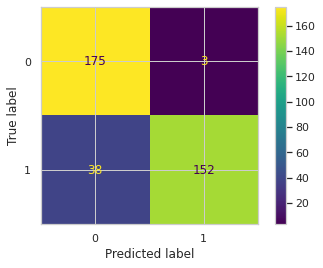

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.98      0.80      0.88       190
class non-spam e-mails       0.82      0.98      0.90       178

              accuracy                           0.89       368
             macro avg       0.90      0.89      0.89       368
          weighted avg       0.90      0.89      0.89       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.89
Performance measure: F1_score  : 0.89
Model Training time (sec)      : 0.0046
#################################################################################################
###########################

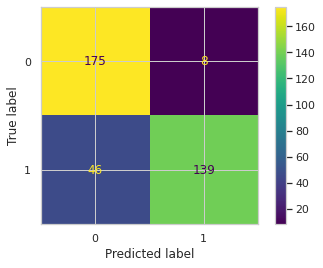

--------------------------------------------------------------------------------------------
        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               
--------------------------------------------------------------------------------------------
                        precision    recall  f1-score   support

    class spam e-mails       0.95      0.75      0.84       185
class non-spam e-mails       0.79      0.96      0.87       183

              accuracy                           0.85       368
             macro avg       0.87      0.85      0.85       368
          weighted avg       0.87      0.85      0.85       368

--------------------------------------------------------------------------------------------
Evalution Measure  : accuracy  : 0.85
Performance measure: F1_score  : 0.85
Model Training time (sec)      : 0.0048
#################################################################################################
###########################

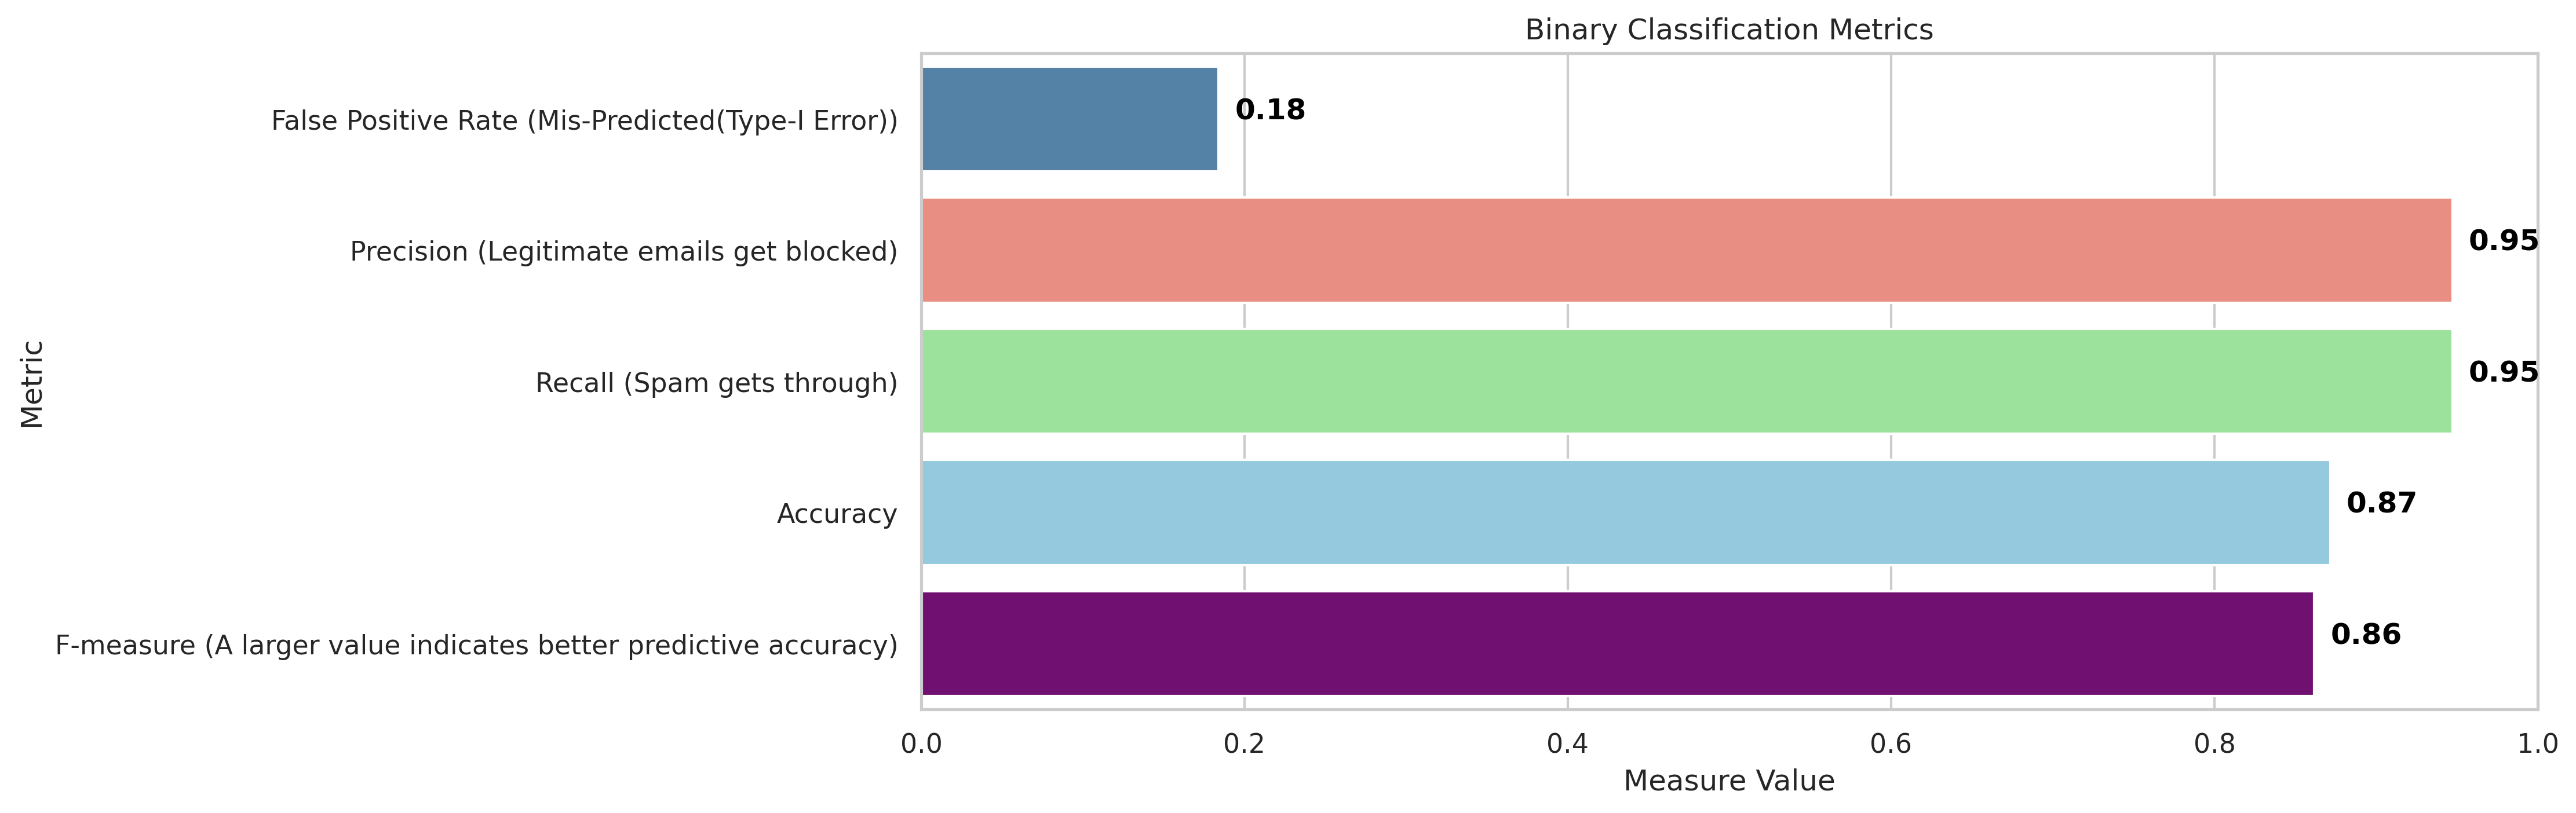

In [80]:
# Process (repeated 'k' times until each fold has been used for testing once...)
#1. Randomly partition the data in k parts or 'folds'
#2. Set one fold aside for testing, train the model on the remaining k-folds and evaluate it on the test fold
#F1 = 2 * (precision * recall) / (precision + recall)
k=10
#experimental_objective = 'accuracy'
skfolds = StratifiedKFold(n_splits=10, shuffle = True) #Stratified K-Folds cross-validator
#We are creating the first algorithm Gaussian Naive Bayes (GaussianNB)
gaussnb = GaussianNB()
#accuracy of model
nb_eval_acc        = []
#F measure of the model
nb_eval_fmeasure   = []
#Training time of the model
nb_eval_trainTimes = []
# AUC scores
auc_scores = []
# Initialize an empty list to store the fold numbers
fold_numbers = []
#Precision of the model
nb_eval_prec   = []
#Recall of the model
nb_eval_recall   = []
#fpr of the model
nb_eval_fpr   = []
#tpr of the model
nb_eval_tpr   = []
#tpr of the model
nb_eval_tpr   = []
#tnr of the model
nb_eval_tnr   = []
#fnr of the model
nb_eval_fnr   = []
from sklearn.metrics import auc
target_names = ["spam","ham"]
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for i, (Tr_idx, Te_idx) in enumerate(skfolds.split(X_Tr,y_Tr)):
    Xs_Tr, Xs_Te = X.iloc[Tr_idx], X.iloc[Te_idx]
    ys_Tr, ys_Te = y.iloc[Tr_idx], y.iloc[Te_idx]
    def gaussnb_model():
        gaussnb.fit(Xs_Tr, ys_Tr)
    # Measure Training Time
    import timeit
    if __name__ == '__main__':
        training_time = timeit.timeit("gaussnb_model()", setup="from __main__ import gaussnb_model", number=1) #TrainingTime(sec)
        nb_eval_trainTimes.append(training_time)
    ys_pred = gaussnb.predict(Xs_Te)
    # Calculate the AUC score for the current fold
    auc = roc_auc_score(ys_Te, ys_pred)
    # Append the AUC score to the list
    auc_scores.append(auc)
    # Append the fold number to the list
    fold_numbers.append(i + 1)
    target_nm = ['class spam e-mails', 'class non-spam e-mails']
    conf_matrix = confusion_matrix(ys_Te, ys_pred, labels=[1, 0])
    #Evaluation measures on unseen data or Classification performance table Summary as per Course book Flach, Table 2.3
    TN, FP, FN, TP = confusion_matrix(ys_Te, ys_pred, labels=[1, 0]).ravel()
    Te_size = ys_Te.size
    Pos  = (TP + FP)
    Neg  = (TN + FN)
    pos  = Pos/ys_Te.size
    neg  = Neg/ys_Te.size
    clr  = pos/neg
    tpr  = TP/Pos #sensitivity or positive recall
    tnr  = TN/Neg #specificity or negative recall
    fpr  = 1-tnr #false alarm rate
    fnr  = 1-tpr
    prec = TP/(TP+FP) #confidence
    rec  = TP/(TP+FN) #recall
    Fm   = (FP+FN)/2 #arithmatic mean
    Fmeasure = 2/((1/prec)+(1/rec))
    acc  = (pos*tpr)+(neg*tnr)
    acc_uniform_sampling = (tpr+tnr)/2
    err  = 1-acc
    print(f"#################################################################################################")
    print(f"                     Test Fold: {i+1} (future context)                                           ")
    print(f"#################################################################################################")
    print(f"----------------------------------------------------------------")
    print(f"Classification performance table Summary as per Flach, Table 2.3")
    print(f"--------------------------------------------------------------------------------------------------------------------------------------")
    print(f"Measure                                                                                                          : Value              ")
    print(f"--------------------------------------------------------------------------------------------------------------------------------------")
    print(f"number of positives        (Pos)                                                                                 : {Pos}")
    print(f"number of negatives        (Neg)                                                                                 : {Neg}")
    print(f"number of true negatives   (TN)                                                                                  : {TN}")
    print(f"number of false positives  (FP)                                                                                  : {FP}")
    print(f"number of flase negatives  (FN)                                                                                  : {FN}")
    print(f"number of true positives   (TP)                                                                                  : {TP}")
    print(f"proportion of positives    (pos)                                                                                 : {format(pos, '.2f')}")
    print(f"proportion of negatives    (neg)                                                                                 : {format(neg, '.2f')}")
    print(f"class ratio                (clr)                                                                                 : {format(clr, '.2f')}")
    print(f"error rate                 (err)                                                                                 : {format(err, '.2f')}")
    print(f"true positive rate         (tpr)                                                                                 : {format(tpr, '.2f')}")
    print(f"true negative rate         (tnr)                                                                                 : {format(tnr, '.2f')}")
    print(f"false positive rate        (fpr)                                                                                 : {format(fpr, '.2f')}")
    print(f"false negative rate        (fnr)                                                                                 : {format(fnr, '.2f')}")
    print(f"precision or confidence    (prec)                                                                                : {format(prec,'.2f')}")
    print(f"recall                     (rec)                                                                                 : {format(rec, '.2f')}")
    print(f"arithmatic mean            (Fm)                                                                                  : {format(Fm,  '.2f')}")
    print(f"accuracy                   (acc)                                                                                 : {format(acc, '.2f')}")
    print(f"F-measure or The harmonic mean of precision and recall (background 10.1) (Fmeasure))                             : {format(Fmeasure,'.2f')}")
    print(f"Avg-Recall or Expectated Accuracy over pos uniformly sampled from unit interval(classifier's good performance on the negatives : {format(acc_uniform_sampling,'.2f')}")
    print(f"---------------------------------------------------------------------------------------------------------------")
    print(f"------------Sufficient set of measurements as per ML Flach, Table 2.3------------------------------------------")
    print(f"---------------------------------------------------------------------------------------------------------------")
    print(f"Size of the Test set       (Te_size)     : {Te_size}")
    print(f"class distribution         (clr)         : {format(clr,'.2f')}")
    print(f"true positive rate         (tpr)         : {format(tpr,'.2f')}")
    print(f"true negative rate         (tnr)         : {format(tnr,'.2f')}")
    print(f"false positive rate        (fpr)         : {format(fpr,'.2f')}")
    print(f"false negative rate        (fnr)         : {format(fnr,'.2f')}")
    print(f"accuracy                   (acc)         : {format(acc,'.2f')}")
    print(f"F-measure or harmonic mean (Fmeasure))   : {format(Fmeasure,'.2f')}")
    print(f"Model Training time (sec)                : {format(training_time,'.4f')}")
    print(f"-------------------------------------------------------------------")
    nb_eval_acc.append(acc)
    nb_eval_fmeasure.append(Fmeasure)
    nb_eval_prec.append(prec)
    nb_eval_recall.append(tpr)
    nb_eval_tpr.append(tpr)
    nb_eval_fpr.append(fpr)
    nb_eval_tnr.append(tnr)
    nb_eval_fnr.append(fnr)
    print(f"--------------------------------------------------------------------------------------------")
    print(f"Assessing Classification performance via contingency table or confusion matrix:")
    print(f"--------------------------------------------------------------------------------------------")
    print(f"confusion matrix: {conf_matrix}")
    print(f"--------------------------------------------------------------------------------------------")
    print(f"                  Confusion Matrix Display Plot                                             ")
    print(f"--------------------------------------------------------------------------------------------")
    confMatDisp = ConfusionMatrixDisplay(conf_matrix)
    confMatDisp.plot()
    plt.show()
    print(f"--------------------------------------------------------------------------------------------")
    print(f"        Evaluation (Accuracy), Performance (F1-score) & Training Time Summary               ")
    print(f"--------------------------------------------------------------------------------------------")
    print(classification_report(ys_Te, ys_pred, target_names = target_nm)) #, labels=[0,1]
    print(f"--------------------------------------------------------------------------------------------")
    print(f"Evalution Measure  : accuracy  : {format(accuracy_score(ys_Te, ys_pred),'.2f')}")
    #print(f"f1_score: {f1_score(ys_Te, ys_pred, average=None)}")
    print(f"Performance measure: F1_score  : {format(f1_score(ys_Te, ys_pred, average=None).mean(),'.2f')}")
    #print(precision_recall_fscore_support(ys_Te, ys_pred, average=None))
    print(f"Model Training time (sec)      : {format(training_time,'.4f')}")
    print(f"#################################################################################################")
print(f"###############################################################")
print(f"Binary Classification Metrics: Naive Bayes Classification Model")
print(f"###############################################################")
avg_accuracy = np.average(nb_eval_acc)
avg_fmeasure = np.average(nb_eval_fmeasure)
avg_prec     = np.average(nb_eval_prec)
avg_recall   = np.average(nb_eval_recall)
avg_fpr      = np.average(nb_eval_fpr)
avg_tpr      = np.average(nb_eval_tpr)
avg_tnr      = np.average(nb_eval_tnr)
avg_fnr      = np.average(nb_eval_fnr)
avg_auc      = np.average(auc_scores)
# Sample data
measure_names = ['False Positive Rate (Mis-Predicted(Type-I Error))', 'Precision (Legitimate emails get blocked)', 'Recall (Spam gets through)', 'Accuracy', 'F-measure (A larger value indicates better predictive accuracy)']
measure_values = [avg_fpr, avg_prec, avg_recall, avg_accuracy, avg_fmeasure]
slider_limits = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]
bar_colors = ['steelblue', 'salmon', 'lightgreen', 'skyblue', 'purple' ]
# Create slider plot
create_slider_plot(measure_names, measure_values, slider_limits, bar_colors)

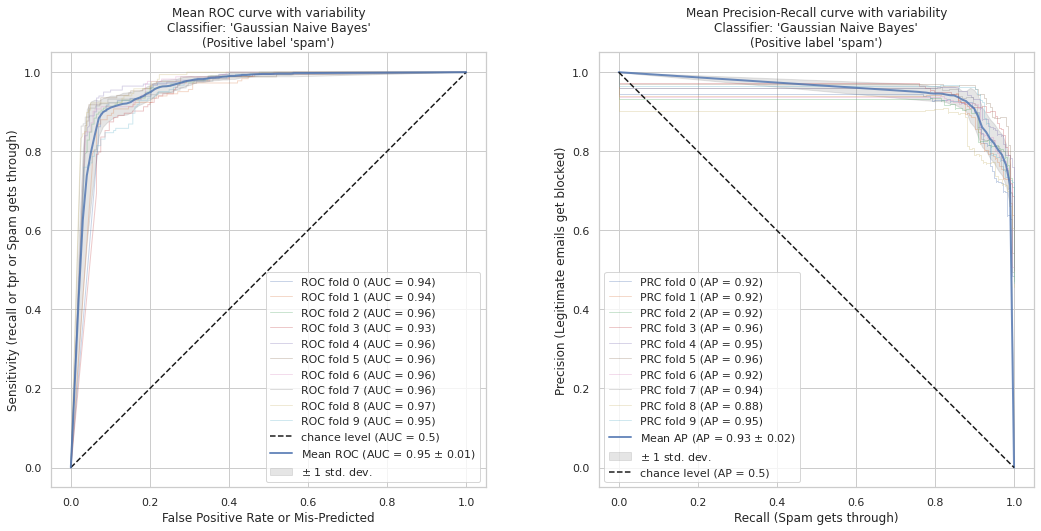

In [81]:
from sklearn.metrics import average_precision_score, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import numpy as np
import matplotlib.pyplot as plt
#the positive label refers to the class "spam" (indicating an email is spam), 
#and the negative label refers to the class "ham" (indicating an email is not spam or legitimate).
target_names = ["ham","spam"] 
k = 10
skfolds = StratifiedKFold(n_splits=k, shuffle=True)
classifier = 'Gaussian Naive Bayes'
gaussnb = GaussianNB()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# ROC Curve
ax = axs[0]
for i, (Tr_idx, Te_idx) in enumerate(skfolds.split(X_Tr, y_Tr)):
    Xs_Tr, Xs_Te = X.iloc[Tr_idx], X.iloc[Te_idx]
    ys_Tr, ys_Te = y.iloc[Tr_idx], y.iloc[Te_idx]
    def gaussnb_model():
        gaussnb.fit(Xs_Tr, ys_Tr)
    gaussnb_model()
    viz = RocCurveDisplay.from_estimator(
        gaussnb,
        Xs_Te,
        ys_Te,
        name=f"ROC fold {i}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.average(aucs)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate or Mis-Predicted",
    ylabel="Sensitivity (recall or tpr or Spam gets through)",
    title=f"Mean ROC curve with variability\nClassifier: '{classifier}'\n(Positive label '{target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower right")

# Precision-Recall Curve
tprs = []
aprecs = []
ax = axs[1]
for i, (Tr_idx, Te_idx) in enumerate(skfolds.split(X_Tr, y_Tr)):
    Xs_Tr, Xs_Te = X.iloc[Tr_idx], X.iloc[Te_idx]
    ys_Tr, ys_Te = y.iloc[Tr_idx], y.iloc[Te_idx]
    
    def gaussnb_model():
        gaussnb.fit(Xs_Tr, ys_Tr)
    
    gaussnb_model()
    viz = PrecisionRecallDisplay.from_estimator(
        gaussnb, Xs_Te, ys_Te,
        name=f"PRC fold {i}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )    
    interp_precision = np.interp(mean_recall, viz.recall[::-1], viz.precision[::-1])
    interp_precision[0] = 1.0
    tprs.append(interp_precision)
    aprecs.append(average_precision_score(ys_Te, gaussnb.predict_proba(Xs_Te)[:, 1]))

mean_precision = np.mean(tprs, axis=0)
mean_precision[-1] = 0.0
mean_ap = np.mean(aprecs)
std_ap = np.std(aprecs)
ax.plot(
    mean_recall,
    mean_precision,
    color="b",
    label=r"Mean AP (AP = %0.2f $\pm$ %0.2f)" % (mean_ap, std_ap),
    lw=2,
    alpha=0.8,
)
std_precision = np.std(tprs, axis=0)
precisions_upper = np.minimum(mean_precision + std_precision, 1)
precisions_lower = np.maximum(mean_precision - std_precision, 0)
ax.fill_between(
    mean_recall,
    precisions_lower,
    precisions_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)
ax.plot(
    [mean_recall[0], mean_recall[-1]],
    [mean_precision[0], mean_precision[-1]],
    "k--",
    label="chance level (AP = 0.5)",
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="Recall (Spam gets through)",
    ylabel="Precision (Legitimate emails get blocked)",
    title=f"Mean Precision-Recall curve with variability\nClassifier: '{classifier}'\n(Positive label '{target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower left")

# Save the plot with high resolution
plt.savefig("roc_precision_recall_plot.png", dpi=300)
plt.show()